# Real_Estate_Data

# 21P-1

# 10_09_2024

# План работы

### Глава 1. Подготовка и импорт

### Глава 2. Загрузка и изучение

### Глава 3. Пропуски

### Глава 4. Дубликаты

### Глава 5. Основная обработка

### Глава 6. Выбросы (outliers)

### Глава 7. Нормализация 

### Глава 8. Масштабирование

### Глава 9. Визуализация

### Глава 10. Анализация

### Глава 11. Постаналитическая обработка

### Глава 12. Определение количества кластеров

### Глава 13. Кластерризация

### Глава 14. Моделирование

### Глава 15. Оценка моделирования

### Глава 16. Резюмирование

### Глава 17. Финальная обработка

# Глава 1
# Подготовка и импорт
# Сергей павлович

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.linear_model import LinearRegression
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import Lasso

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix




import warnings
warnings.filterwarnings('ignore')


# Глава 2
# Загрузка и изучение


### Загрузка данных

In [2]:
df = pd.read_csv('real_estate_data.csv')


### Просмотр данных

In [3]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,NaN,48000.0,EUR
403485,403486,Konut,Daire,2/21/19,NaN,2,6,NaN,NaN,NaN,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,NaN,900.0,TRY


Этот датасет представляет собой информацию о недвижимости в Турции.

В нём содержатся различные характеристики объектов недвижимости

### Просмотр количества строк и столбцов

In [4]:
df.shape

(403487, 17)

403487 строк

17 столбцов

### Изучение типов данных

In [5]:
df.dtypes

id                     int64
type                  object
sub_type              object
start_date            object
end_date              object
listing_type           int64
tom                    int64
building_age          object
total_floor_count     object
floor_no              object
room_count            object
size                 float64
address               object
furnished            float64
heating_type          object
price                float64
price_currency        object
dtype: object

Это описание показывает, что большинство данных представлены в текстовом формате (object),

а числовые данные (целые и с плавающей запятой) относятся к цене, площади, времени нахождения на рынке и идентификаторам.

### Проверка наличия пустых значений в dataset

In [6]:
df.isnull().sum()

id                        0
type                      0
sub_type                  0
start_date                0
end_date             137189
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
floor_no              35296
room_count                0
size                 146006
address                   0
furnished            403487
heating_type          27970
price                   715
price_currency          715
dtype: int64

id, type, sub_type, start_date, listing_type, tom, room_count, address: В этих столбцах нет пропущенных значений (0 NaN).

end_date: 137189 пропущенных значений, вероятно, потому что для многих объектов листинг не завершен или информация не указана.

building_age: 27390 пропущенных значений, что может быть связано с отсутствием информации о возрасте здания.

total_floor_count: 28021 пропущенных значений, что может говорить о недостатке информации о количестве этажей.

floor_no: 35296 пропущенных значений, что указывает на отсутствие данных об этаже для некоторых объектов.

size: 146006 пропущенных значений, что говорит об отсутствии информации о размере недвижимости для значительного числа объектов.

furnished: 403487 пропущенных значений — это означает, что в данном столбце нет данных вообще (вся информация отсутствует).

heating_type: 27970 пропущенных значений, что указывает на отсутствие информации о типе отопления для некоторых объектов.

price и price_currency: Оба столбца имеют 715 пропущенных значений, что означает, что для некоторых объектов не указана цена и валюта.

### Описание признаков

##### id - индитификатор
##### type - тип недвижимости (Konut либо Housing).
##### sub_type - подгруппа по типу недвижимости (Daire либо Flat).
##### start_date - дата, когда листинг начинает действовать на рынке.
##### end_date - дата, когда листинг больше не активен на рынке.
##### listing_type - тип объявления.
##### tom - время выхода на рынок.
##### building_age - возраст постройки.
##### total_floor_count - общее количество этажей в здании.
##### floor_no - информация о номере этажа в данном объявлении.
##### room_count -количество комнат в квартире.
##### size - количесто квадратов.
##### address - адрес.
##### furnished - оснашенность жилья (обставленность мебелью).
##### heating_type - различные типы систем отопления.
##### price - цена.
##### price_currency - валюта цены на жилье.

# Глава 3
# Пропуски
# Артур русланович

### Оценивание доли пропущенных данных

In [7]:
df.isna().sum() / len(df)

id                   0.000000
type                 0.000000
sub_type             0.000000
start_date           0.000000
end_date             0.340008
listing_type         0.000000
tom                  0.000000
building_age         0.067883
total_floor_count    0.069447
floor_no             0.087477
room_count           0.000000
size                 0.361860
address              0.000000
furnished            1.000000
heating_type         0.069321
price                0.001772
price_currency       0.001772
dtype: float64

Для разнообразной обработки пропущенных данных можно применить разные стратегии в зависимости от особенностей каждого столбца. Вот несколько подходов:

1. furnished (100% пропусков): 

Решение: Удалить столбец.

Обоснование: Все данные в этом столбце отсутствуют. Даже попытка заполнения не добавит полезной информации. Удаление освободит место и упростит анализ.

2. size (36.18% пропусков):

Решение: Заполнить пропуски средним значением.

Обоснование: Поскольку размер объекта важен для анализа, можно заполнить пропуски средним значением.

3. end_date (34% пропусков):

Решение: Заполнить с помощью экстраполяции (предсказание на основе имеющихся данных).

Обоснование: end_date может быть рассчитана на основе данных о start_date. Если есть информация о типичной продолжительности периода, то можно экстраполировать дату завершения.

4. building_age (6.79% пропусков):

Решение: Заполнить медианой.

Обоснование: building_age может сильно варьироваться, поэтому медиана будет более устойчивым показателем, чем среднее. Она также минимизирует влияние выбросов (очень старые или очень новые здания).

5. total_floor_count (6.94% пропусков):

Решение: Заполнить модой.

Обоснование: Этот столбец обычно принимает ограниченное количество значений (например, 5, 10, 20 этажей). Заполнение наиболее частым значением (модой) будет уместно, так как здания в пределах одного района могут иметь схожую высоту.

6. floor_no (8.75% пропусков):

Решение: Заполнить случайными значениями из распределения по этому столбцу.

Обоснование: Это добавит элемент случайности, но сохранит распределение значений так, чтобы не нарушать структуру данных. Например, если больше данных на нижних этажах, то и заполнение будет более вероятно этими значениями.

7. heating_type (6.93% пропусков):

Решение: Использовать заполнение по группам.

Обоснование: Можно сгруппировать данные по type или sub_type и заполнить пропуски наиболее частыми значениями в этих группах. Например, в однокомнатных квартирах может быть более типичное отопление, чем в загородных домах.

8. price и price_currency (по 0.18% пропусков):

Решение: Заполнить предыдущими значениями (forward fill).

Обоснование: Пропуски в этих столбцах минимальны, и можно предположить, что цены не сильно меняются между соседними записями. Поэтому можно заполнить пропуски на основе предыдущих значений в наборе данных.


### Удаление строк с пропущенными значениями

In [8]:
# Удаление столбца furnished (100% пропусков)
df.drop(columns=['furnished'], inplace=True)

### Заполнение пропущенных значений

In [9]:
# Заполняем пропущенные значения средним значением
df['size'].fillna(df['size'].mean(), inplace=True)

In [10]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Заполняем пропуски в end_date, добавляя 6 месяцев к start_date
df['end_date'] = df['end_date'].fillna(df['start_date'] + pd.DateOffset(months=6))

In [11]:
df['building_age'] = pd.to_numeric(df['building_age'], errors='coerce')

# Заполним пропуски медианой
df['building_age'].fillna(df['building_age'].median(), inplace=True)

In [12]:
# Заполнение total_floor_count (6.94%) модой
df['total_floor_count'].fillna(df['total_floor_count'].mode()[0], inplace=True)

In [13]:
# Заполнение floor_no (8.75%) случайными значениями из распределения
floor_no_dist = df['floor_no'].dropna().values
df['floor_no'] = df['floor_no'].apply(lambda x: np.random.choice(floor_no_dist) if pd.isna(x) else x)

In [14]:
# Заполнение heating_type (6.93%) по группам (по типу объекта)
try:
    df['heating_type'] = df.groupby('type')['heating_type'].apply(lambda group: group.fillna(group.mode()[0]))
except Exception as e:
    pass

In [15]:
# Заполнение price и price_currency (0.18%) предыдущими значениями
df['price'].fillna(method='ffill', inplace=True)
df['price_currency'].fillna(method='ffill', inplace=True)

### Проверка результата

In [16]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,2018-12-10,1/9/19,2,30,0.0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,2,Konut,Daire,2019-02-13,2019-08-13 00:00:00,1,14,0.0,20 ve üzeri,20 ve üzeri,1+0,43.000000,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,3,Konut,Daire,2018-10-09,11/8/18,1,30,0.0,1,Yüksek Giriş,2+1,279.349094,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,2018-09-10,10/10/18,1,30,3.0,20 ve üzeri,20 ve üzeri,6+1,450.000000,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,2018-12-10,1/9/19,1,30,0.0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,2018-09-18,2019-03-18 00:00:00,2,162,0.0,4,2,+,279.349094,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,403484,Konut,Daire,2018-10-11,2019-04-11 00:00:00,1,139,0.0,4,Bahçe katı,2+1,279.349094,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,403485,Konut,Daire,2018-11-22,2019-05-22 00:00:00,1,97,0.0,4,2,1+1,279.349094,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,403486,Konut,Daire,2019-02-21,2019-08-21 00:00:00,2,6,0.0,4,3,2+1,2.000000,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


# Глава 4
# Дубликаты

### Поиск дубликатов

In [17]:
df[df.duplicated()].count()

id                   0
type                 0
sub_type             0
start_date           0
end_date             0
listing_type         0
tom                  0
building_age         0
total_floor_count    0
floor_no             0
room_count           0
size                 0
address              0
heating_type         0
price                0
price_currency       0
dtype: int64

Явные дубликаты отсутствуют.

Неявные можно вычислить только при помощи ручного способа.

# Глава 5
# Основная обработка

### Удаление мусорных категоррий

In [18]:
df.drop(columns=['id'], inplace=True)

In [19]:
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,Konut,Rezidans,2018-12-10,1/9/19,2,30,0.0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,Konut,Daire,2019-02-13,2019-08-13 00:00:00,1,14,0.0,20 ve üzeri,20 ve üzeri,1+0,43.000000,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,Konut,Daire,2018-10-09,11/8/18,1,30,0.0,1,Yüksek Giriş,2+1,279.349094,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,Konut,Rezidans,2018-09-10,10/10/18,1,30,3.0,20 ve üzeri,20 ve üzeri,6+1,450.000000,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,Konut,Rezidans,2018-12-10,1/9/19,1,30,0.0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,Konut,Daire,2018-09-18,2019-03-18 00:00:00,2,162,0.0,4,2,+,279.349094,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,Konut,Daire,2018-10-11,2019-04-11 00:00:00,1,139,0.0,4,Bahçe katı,2+1,279.349094,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,Konut,Daire,2018-11-22,2019-05-22 00:00:00,1,97,0.0,4,2,1+1,279.349094,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,Konut,Daire,2019-02-21,2019-08-21 00:00:00,2,6,0.0,4,3,2+1,2.000000,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


### Преобразование данных в оптимальные типы

In [20]:
#start_date и end_date:
# Сейчас они представлены как object. Следует преобразовать их в datetime тип

df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

In [21]:
# building_age, total_floor_count, floor_no и room_count:
# Эти столбцы представлены как object, но они должны быть числами.

df['building_age'] = pd.to_numeric(df['building_age'], errors='coerce')
df['total_floor_count'] = pd.to_numeric(df['total_floor_count'], errors='coerce')
df['floor_no'] = pd.to_numeric(df['floor_no'], errors='coerce')
df['room_count'] = pd.to_numeric(df['room_count'].str.replace(r'[^\d]', '', regex=True), errors='coerce')

df['room_count'] = pd.to_numeric(df['room_count'], errors='coerce')

def sum_digits(number):
    if pd.isna(number):
        return None
    return sum(int(digit) for digit in str(int(number)))

df['room_count'] = df['room_count'].apply(sum_digits)

### Обработка валют

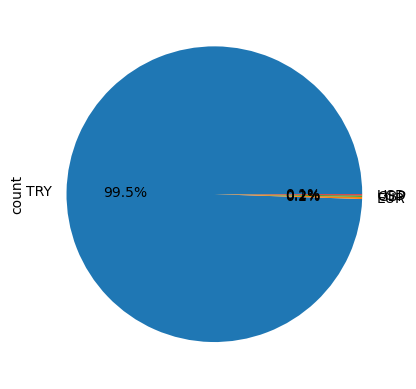

In [22]:
df['price_currency'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.show()

сделок не в лирах меньше процента, поэтому их можно удалить.

In [23]:
df = df[df['price_currency'] == 'TRY']

### Проверка обработки

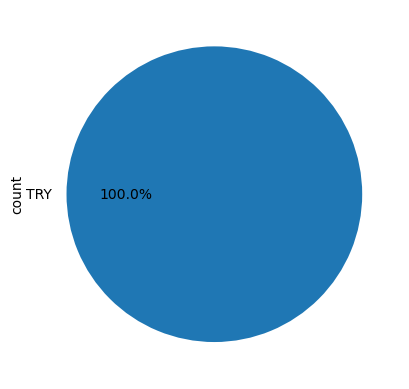

In [24]:
df['price_currency'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.show()

In [25]:
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,Konut,Rezidans,2018-12-10,2019-01-09,2,30,0.0,NaN,2.0,3.0,90.000000,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,Konut,Daire,2019-02-13,2019-08-13,1,14,0.0,NaN,NaN,1.0,43.000000,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,Konut,Daire,2018-10-09,2018-11-08,1,30,0.0,1.0,NaN,3.0,279.349094,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,Konut,Rezidans,2018-09-10,2018-10-10,1,30,3.0,NaN,NaN,7.0,450.000000,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,Konut,Rezidans,2018-12-10,2019-01-09,1,30,0.0,NaN,2.0,3.0,90.000000,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403481,Konut,Daire,2019-01-12,2019-07-12,1,46,0.0,4.0,6.0,NaN,279.349094,İzmir/Menemen/Zeytinlik,NaN,185000.0,TRY
403482,Konut,Daire,2018-09-18,2019-03-18,2,162,0.0,4.0,2.0,NaN,279.349094,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,Konut,Daire,2018-10-11,2019-04-11,1,139,0.0,4.0,NaN,3.0,279.349094,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403485,Konut,Daire,2019-02-21,2019-08-21,2,6,0.0,4.0,3.0,3.0,2.000000,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


In [26]:
df.dtypes

type                         object
sub_type                     object
start_date           datetime64[ns]
end_date             datetime64[ns]
listing_type                  int64
tom                           int64
building_age                float64
total_floor_count           float64
floor_no                    float64
room_count                  float64
size                        float64
address                      object
heating_type                 object
price                       float64
price_currency               object
dtype: object

### Создание новых признаков на основе существующих

In [27]:
# Разделяем адрес на три составляющие: город, район и квартал
df[['city', 'district', 'neighborhood']] = df['address'].str.split('/', expand=True)
df.drop(columns=['address'], inplace=True)

### Проверка результата

In [28]:
df[['city', 'district', 'neighborhood']].head()

,city,district,neighborhood
0,İstanbul,Kartal,Kordonboyu
1,İstanbul,Kartal,Kordonboyu
2,Tekirdağ,Çorlu,Reşadiye
3,İstanbul,Beşiktaş,Levent
4,İstanbul,Kartal,Kordonboyu


In [29]:
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,Konut,Rezidans,2018-12-10,2019-01-09,2,30,0.0,NaN,2.0,3.0,90.000000,Fancoil,3500.0,TRY,İstanbul,Kartal,Kordonboyu
1,Konut,Daire,2019-02-13,2019-08-13,1,14,0.0,NaN,NaN,1.0,43.000000,Fancoil,490000.0,TRY,İstanbul,Kartal,Kordonboyu
2,Konut,Daire,2018-10-09,2018-11-08,1,30,0.0,1.0,NaN,3.0,279.349094,Fancoil,155000.0,TRY,Tekirdağ,Çorlu,Reşadiye
3,Konut,Rezidans,2018-09-10,2018-10-10,1,30,3.0,NaN,NaN,7.0,450.000000,Fancoil,32500000.0,TRY,İstanbul,Beşiktaş,Levent
4,Konut,Rezidans,2018-12-10,2019-01-09,1,30,0.0,NaN,2.0,3.0,90.000000,Fancoil,1450000.0,TRY,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403481,Konut,Daire,2019-01-12,2019-07-12,1,46,0.0,4.0,6.0,NaN,279.349094,NaN,185000.0,TRY,İzmir,Menemen,Zeytinlik
403482,Konut,Daire,2018-09-18,2019-03-18,2,162,0.0,4.0,2.0,NaN,279.349094,NaN,1500.0,TRY,İstanbul,Sultanbeyli,Adil
403483,Konut,Daire,2018-10-11,2019-04-11,1,139,0.0,4.0,NaN,3.0,279.349094,NaN,120000.0,TRY,Sakarya,Adapazarı,Cumhuriyet
403485,Konut,Daire,2019-02-21,2019-08-21,2,6,0.0,4.0,3.0,3.0,2.000000,NaN,900.0,TRY,Aydın,Kuşadası,Türkmen


### Преобразование категориальных переменных в числовые значения (двоичные)

In [30]:
categorical_columns = ['type', 'sub_type', 'heating_type', 'price_currency']
df = pd.get_dummies(df, columns=categorical_columns)
df.drop(columns=['city'], inplace=True)
df.drop(columns=['district'], inplace=True)
df.drop(columns=['neighborhood'], inplace=True)

### Проверка результата

In [31]:
df

,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,...,heating_type_Klima,heating_type_Kombi (Doğalgaz),heating_type_Kombi (Elektrikli),heating_type_Merkezi Sistem,heating_type_Merkezi Sistem (Isı Payı Ölçer),heating_type_Soba (Doğalgaz),heating_type_Soba (Kömür),heating_type_Yerden Isıtma,heating_type_Yok,price_currency_TRY
0,2018-12-10,2019-01-09,2,30,0.0,NaN,2.0,3.0,90.000000,3500.0,...,False,False,False,False,False,False,False,False,False,True
1,2019-02-13,2019-08-13,1,14,0.0,NaN,NaN,1.0,43.000000,490000.0,...,False,False,False,False,False,False,False,False,False,True
2,2018-10-09,2018-11-08,1,30,0.0,1.0,NaN,3.0,279.349094,155000.0,...,False,False,False,False,False,False,False,False,False,True
3,2018-09-10,2018-10-10,1,30,3.0,NaN,NaN,7.0,450.000000,32500000.0,...,False,False,False,False,False,False,False,False,False,True
4,2018-12-10,2019-01-09,1,30,0.0,NaN,2.0,3.0,90.000000,1450000.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403481,2019-01-12,2019-07-12,1,46,0.0,4.0,6.0,NaN,279.349094,185000.0,...,False,False,False,False,False,False,False,False,False,True
403482,2018-09-18,2019-03-18,2,162,0.0,4.0,2.0,NaN,279.349094,1500.0,...,False,False,False,False,False,False,False,False,False,True
403483,2018-10-11,2019-04-11,1,139,0.0,4.0,NaN,3.0,279.349094,120000.0,...,False,False,False,False,False,False,False,False,False,True
403485,2019-02-21,2019-08-21,2,6,0.0,4.0,3.0,3.0,2.000000,900.0,...,False,False,False,False,False,False,False,False,False,True


# Глава 6
# Выбросы (outliers)
# Артур русланович

### Удаление выбросов

In [32]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.03)
        Q3 = df[column].quantile(0.97)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

df = remove_outliers(df)

Удалили выбросы при помощи межквартильного размаха

### Проверка данных

In [33]:
df

,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,...,heating_type_Klima,heating_type_Kombi (Doğalgaz),heating_type_Kombi (Elektrikli),heating_type_Merkezi Sistem,heating_type_Merkezi Sistem (Isı Payı Ölçer),heating_type_Soba (Doğalgaz),heating_type_Soba (Kömür),heating_type_Yerden Isıtma,heating_type_Yok,price_currency_TRY
7,2018-10-03,2019-01-03,1,92,0.0,4.0,5.0,5.0,279.349094,1500000.0,...,False,False,False,False,False,False,False,False,False,True
12,2018-09-13,2018-10-13,1,30,0.0,3.0,2.0,3.0,279.349094,270000.0,...,False,False,False,False,False,False,False,False,False,True
14,2018-09-22,2019-03-22,1,158,1.0,4.0,3.0,4.0,279.349094,75000.0,...,False,False,False,False,False,False,False,False,False,True
15,2018-10-02,2019-01-04,2,94,0.0,2.0,3.0,5.0,200.000000,3600.0,...,False,False,False,False,False,False,False,False,False,True
24,2018-09-13,2018-11-13,1,61,0.0,3.0,2.0,3.0,279.349094,270000.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403478,2018-10-12,2018-11-11,1,30,0.0,4.0,3.0,4.0,279.349094,500000.0,...,False,False,False,False,False,False,False,False,False,True
403479,2018-09-12,2018-11-20,2,69,0.0,4.0,7.0,4.0,279.349094,1700.0,...,False,False,False,False,False,False,False,False,False,True
403480,2018-09-25,2019-01-23,1,120,0.0,4.0,5.0,4.0,279.349094,185000.0,...,False,False,False,False,False,False,False,False,False,True
403485,2019-02-21,2019-08-21,2,6,0.0,4.0,3.0,3.0,2.000000,900.0,...,False,False,False,False,False,False,False,False,False,True


# Глава 7

# Нормализация

### Нормализация

In [34]:
df_export = df.copy()

In [35]:
numerical_columns = ['listing_type', 'tom', 'building_age', 'total_floor_count', 'floor_no', 'room_count', 'size', 'price']

# Инициализируем MinMaxScaler
scaler = MinMaxScaler()

# Применяем нормализацию только к числовым столбцам
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Проверка данных

In [36]:
df[numerical_columns].head()

,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price
7,0.0,0.511111,0.0,0.333333,0.235294,0.363636,0.457059,0.668151
12,0.0,0.166667,0.0,0.222222,0.058824,0.181818,0.457059,0.120267
14,0.0,0.877778,0.2,0.333333,0.117647,0.272727,0.457059,0.033408
15,0.5,0.522222,0.0,0.111111,0.117647,0.363636,0.326765,0.001604
24,0.0,0.338889,0.0,0.222222,0.058824,0.181818,0.457059,0.120267


In [37]:
df

,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,...,heating_type_Klima,heating_type_Kombi (Doğalgaz),heating_type_Kombi (Elektrikli),heating_type_Merkezi Sistem,heating_type_Merkezi Sistem (Isı Payı Ölçer),heating_type_Soba (Doğalgaz),heating_type_Soba (Kömür),heating_type_Yerden Isıtma,heating_type_Yok,price_currency_TRY
7,2018-10-03,2019-01-03,0.0,0.511111,0.0,0.333333,0.235294,0.363636,0.457059,0.668151,...,False,False,False,False,False,False,False,False,False,True
12,2018-09-13,2018-10-13,0.0,0.166667,0.0,0.222222,0.058824,0.181818,0.457059,0.120267,...,False,False,False,False,False,False,False,False,False,True
14,2018-09-22,2019-03-22,0.0,0.877778,0.2,0.333333,0.117647,0.272727,0.457059,0.033408,...,False,False,False,False,False,False,False,False,False,True
15,2018-10-02,2019-01-04,0.5,0.522222,0.0,0.111111,0.117647,0.363636,0.326765,0.001604,...,False,False,False,False,False,False,False,False,False,True
24,2018-09-13,2018-11-13,0.0,0.338889,0.0,0.222222,0.058824,0.181818,0.457059,0.120267,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403478,2018-10-12,2018-11-11,0.0,0.166667,0.0,0.333333,0.117647,0.272727,0.457059,0.222717,...,False,False,False,False,False,False,False,False,False,True
403479,2018-09-12,2018-11-20,0.5,0.383333,0.0,0.333333,0.352941,0.272727,0.457059,0.000757,...,False,False,False,False,False,False,False,False,False,True
403480,2018-09-25,2019-01-23,0.0,0.666667,0.0,0.333333,0.235294,0.272727,0.457059,0.082405,...,False,False,False,False,False,False,False,False,False,True
403485,2019-02-21,2019-08-21,0.5,0.033333,0.0,0.333333,0.117647,0.181818,0.001642,0.000401,...,False,False,False,False,False,False,False,False,False,True


# Глава 8

# Маштабирование

### Маштабирование

In [38]:
numerical_columns = ['listing_type', 'tom', 'building_age', 'total_floor_count', 'floor_no', 'room_count', 'size', 'price']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Проверка данных

In [39]:
df

,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,...,heating_type_Klima,heating_type_Kombi (Doğalgaz),heating_type_Kombi (Elektrikli),heating_type_Merkezi Sistem,heating_type_Merkezi Sistem (Isı Payı Ölçer),heating_type_Soba (Doğalgaz),heating_type_Soba (Kömür),heating_type_Yerden Isıtma,heating_type_Yok,price_currency_TRY
7,2018-10-03,2019-01-03,-0.650621,0.810301,-0.435620,-0.402075,1.024953,1.359729,1.186005,5.096144,...,False,False,False,False,False,False,False,False,False,True
12,2018-09-13,2018-10-13,-0.650621,-0.598230,-0.435620,-0.915479,-0.548105,-0.650361,1.186005,0.173088,...,False,False,False,False,False,False,False,False,False,True
14,2018-09-22,2019-03-22,-0.650621,2.309705,0.339343,-0.402075,-0.023753,0.354684,1.186005,-0.607397,...,False,False,False,False,False,False,False,False,False,True
15,2018-10-02,2019-01-04,1.469797,0.855738,-0.435620,-1.428883,-0.023753,1.359729,0.269898,-0.893175,...,False,False,False,False,False,False,False,False,False,True
24,2018-09-13,2018-11-13,-0.650621,0.106036,-0.435620,-0.915479,-0.548105,-0.650361,1.186005,0.173088,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403478,2018-10-12,2018-11-11,-0.650621,-0.598230,-0.435620,-0.402075,-0.023753,0.354684,1.186005,1.093659,...,False,False,False,False,False,False,False,False,False,True
403479,2018-09-12,2018-11-20,1.469797,0.287782,-0.435620,-0.402075,2.073659,0.354684,1.186005,-0.900779,...,False,False,False,False,False,False,False,False,False,True
403480,2018-09-25,2019-01-23,-0.650621,1.446412,-0.435620,-0.402075,1.024953,0.354684,1.186005,-0.167124,...,False,False,False,False,False,False,False,False,False,True
403485,2019-02-21,2019-08-21,1.469797,-1.143467,-0.435620,-0.402075,-0.023753,-0.650361,-2.016067,-0.903981,...,False,False,False,False,False,False,False,False,False,True


# Глава 9

# Визуализация
# Артур русланович

### Гистограммы

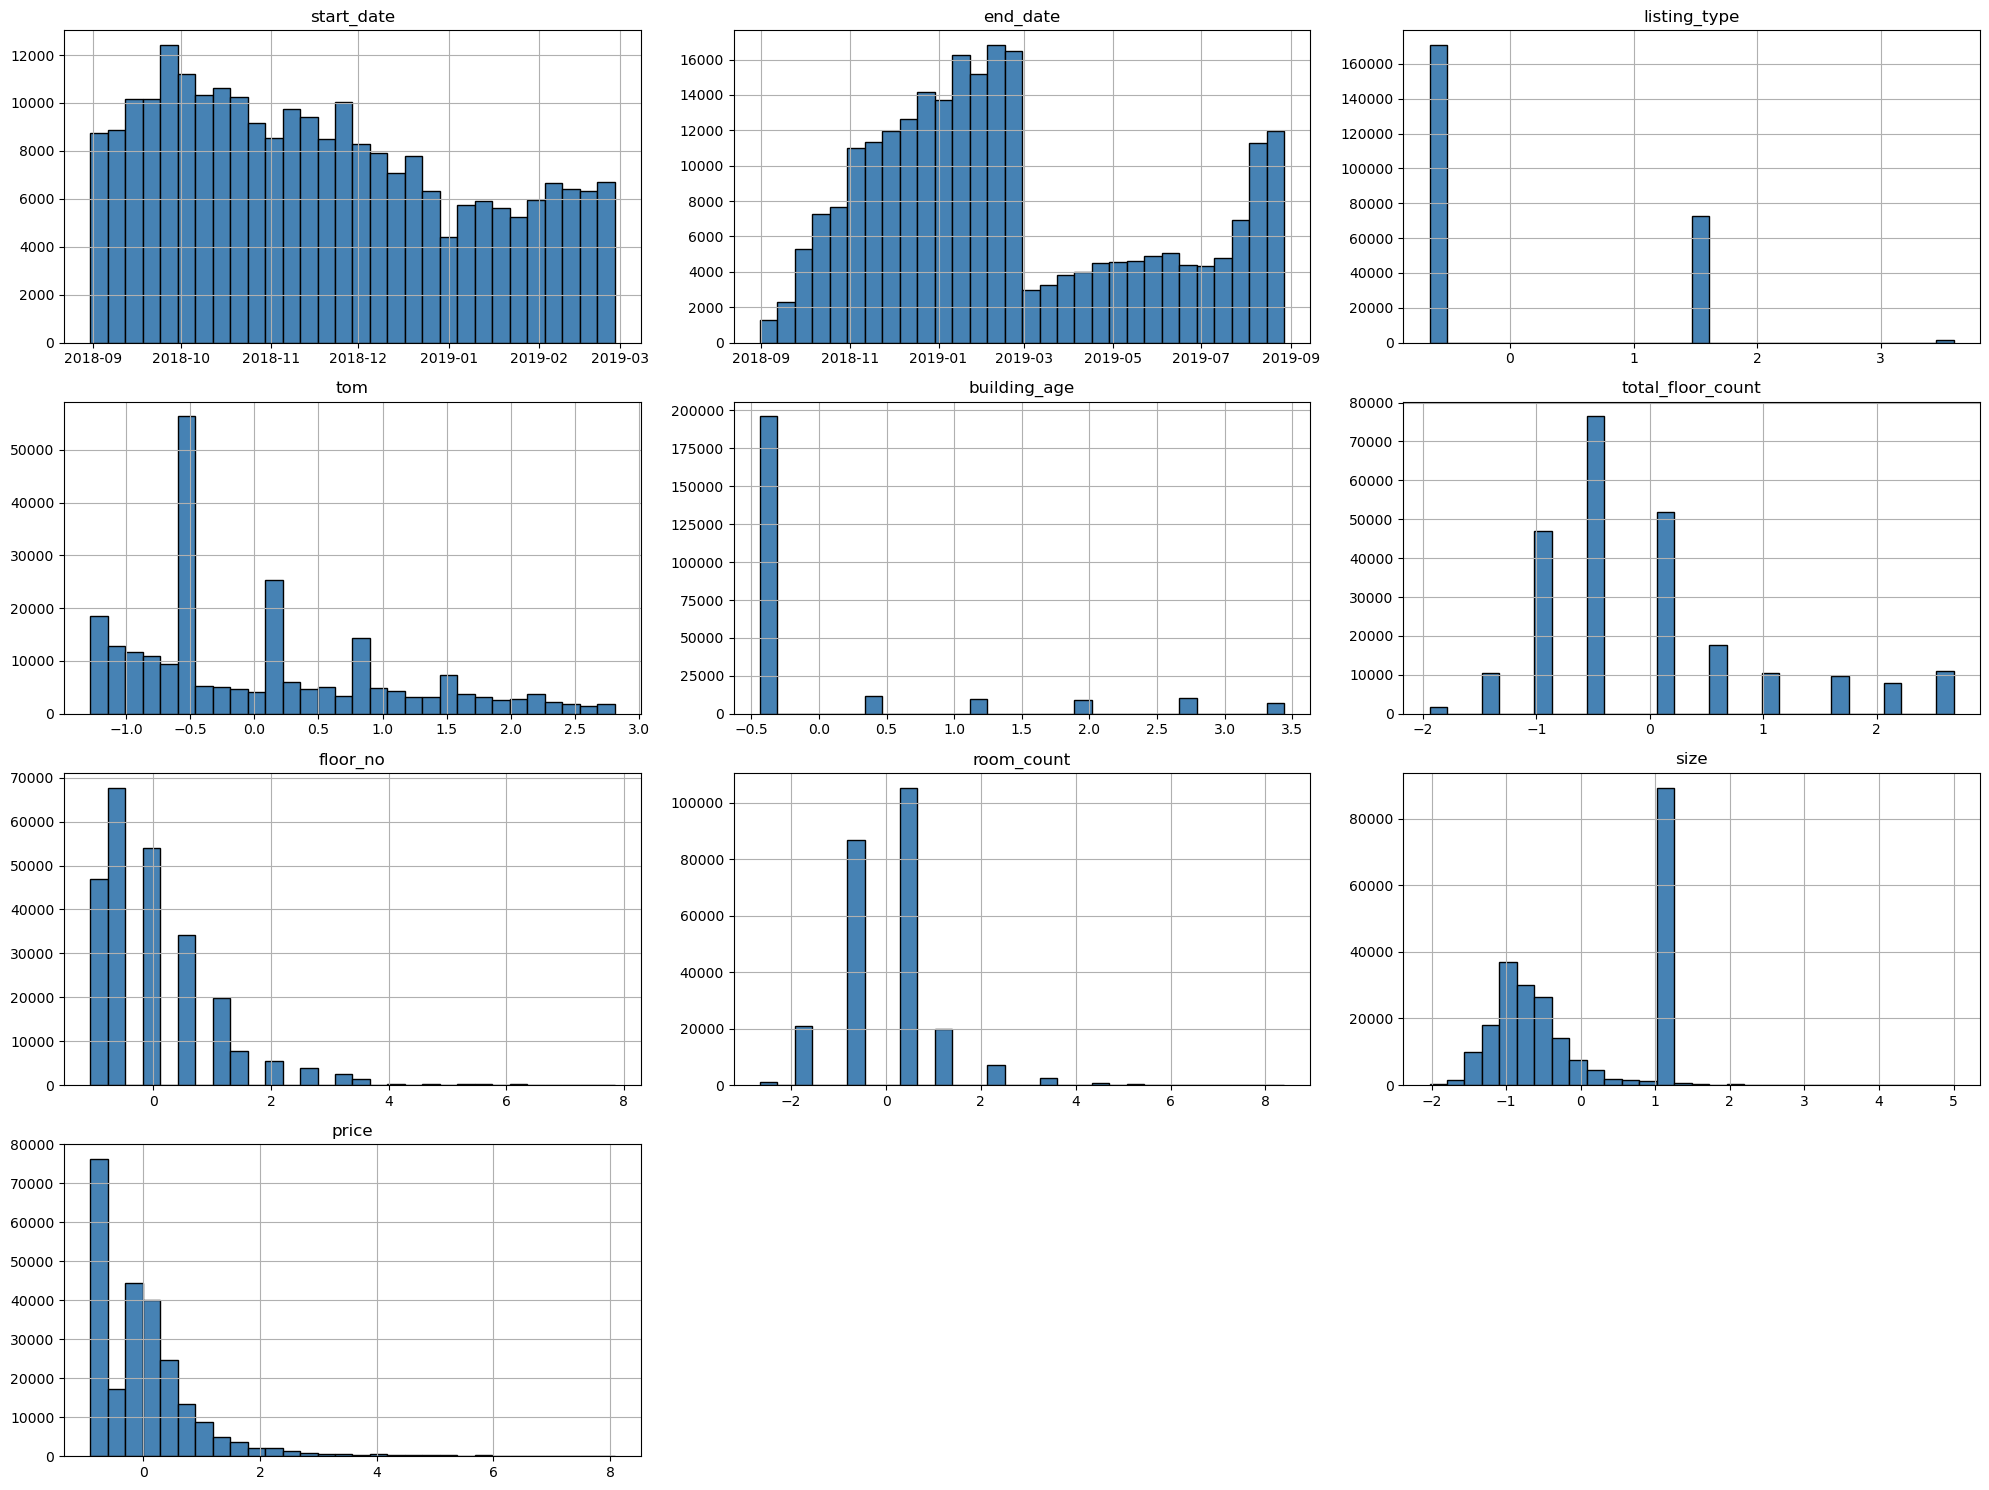

In [40]:
df.hist(bins=30, figsize=(20, 15), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

### Диаграммы плотности

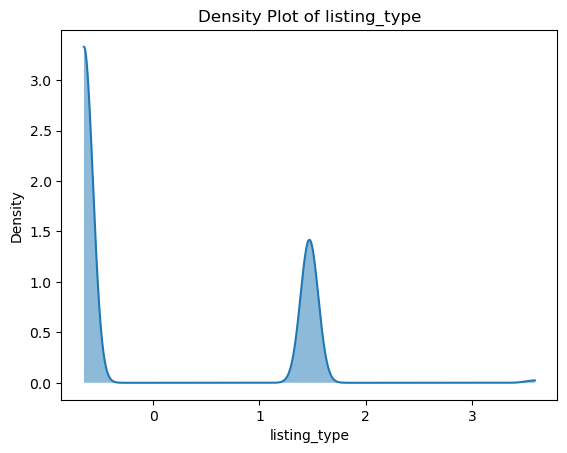

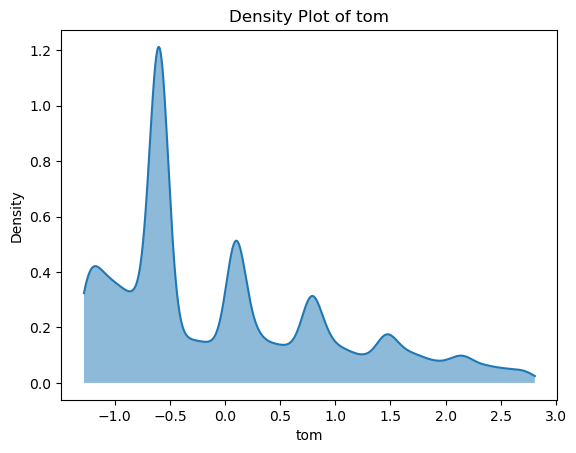

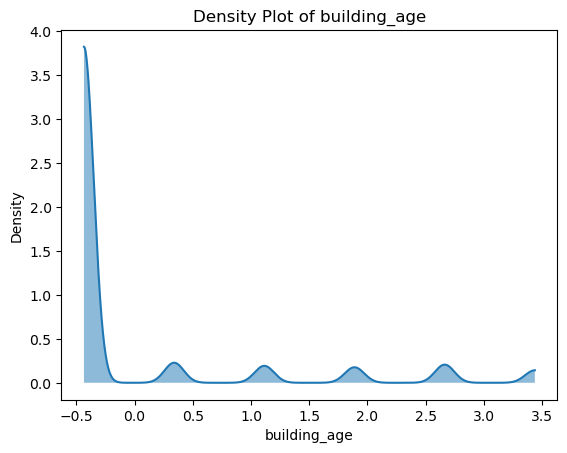

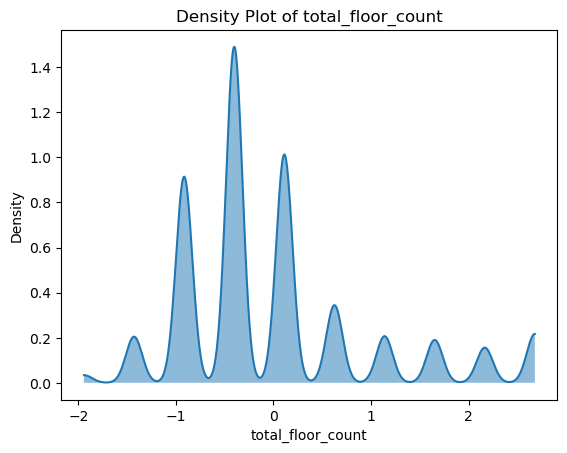

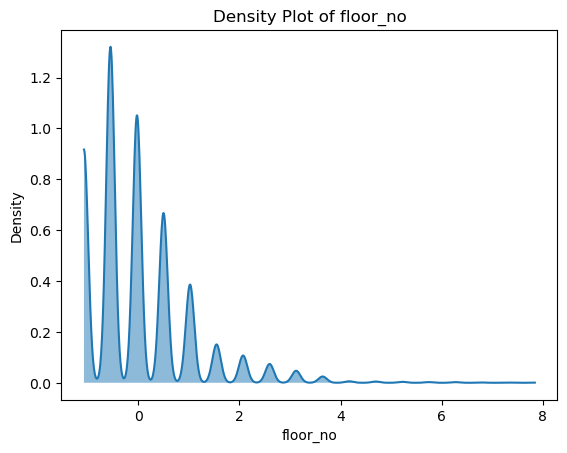

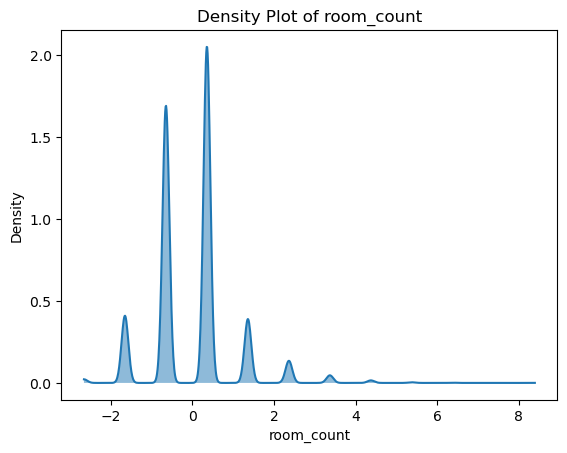

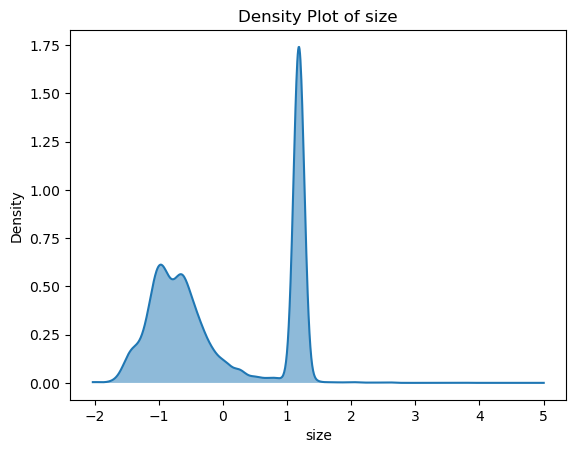

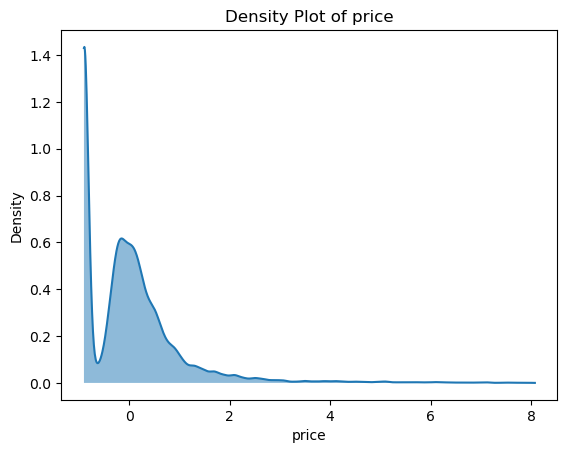

In [41]:
from scipy.stats import gaussian_kde

def plot_density(column_data, column_name):
    kde = gaussian_kde(column_data, bw_method='scott')  # Используем gaussian_kde для оценки плотности
    x = np.linspace(min(column_data), max(column_data), 1000)
    y = kde(x)
    
    plt.figure()
    plt.plot(x, y, label='Density')
    plt.fill_between(x, y, alpha=0.5)
    plt.title(f'Density Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.show()

# Создание графиков плотности для всех числовых признаков
for column in df.select_dtypes(include=[np.number]).columns:
    plot_density(df[column], column)

### Ящики с усами

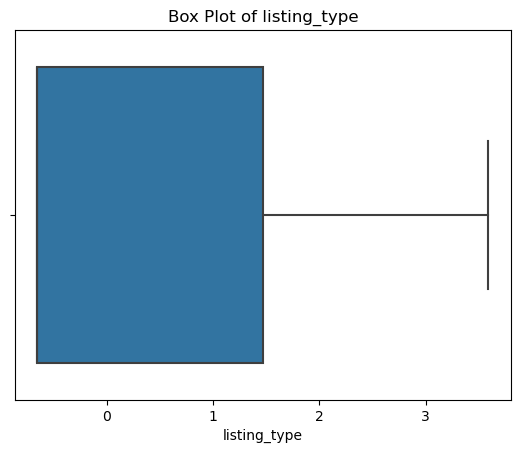

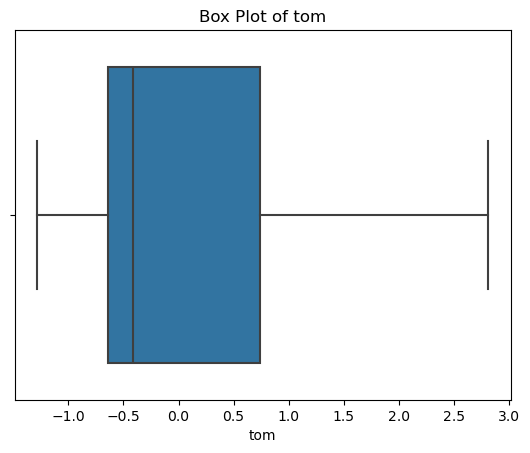

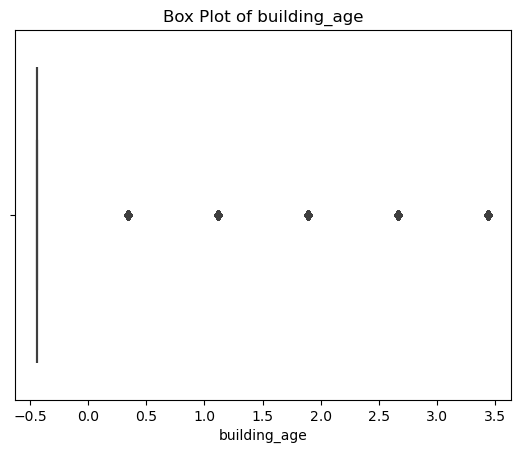

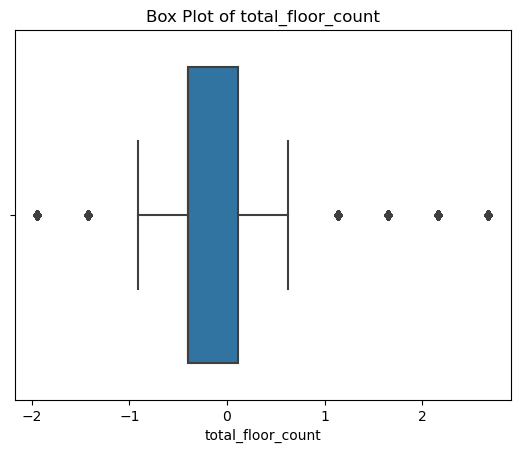

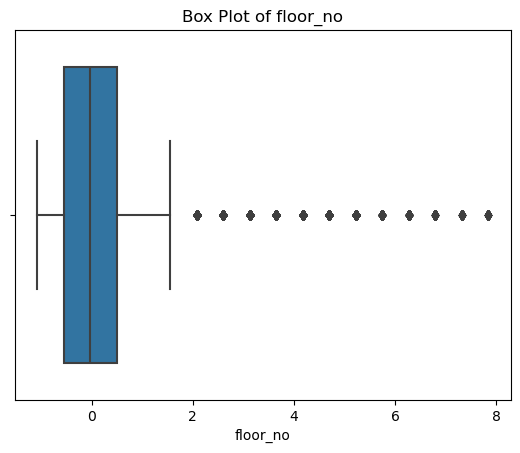

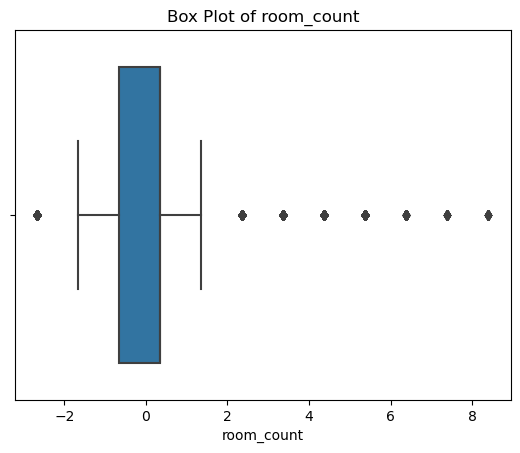

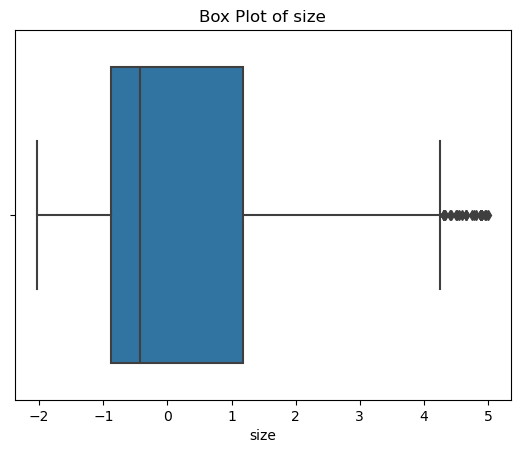

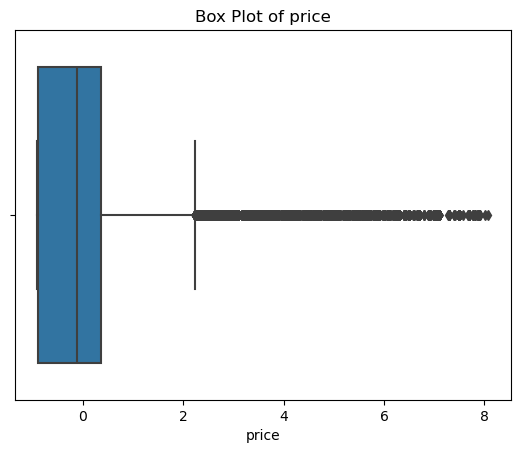

In [42]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure()  # Создание нового графика
    sns.boxplot(x=df[column])  # Построение графика ящика с усами
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [43]:
df.drop(columns=['type_Konut'], inplace=True)

### Пироги

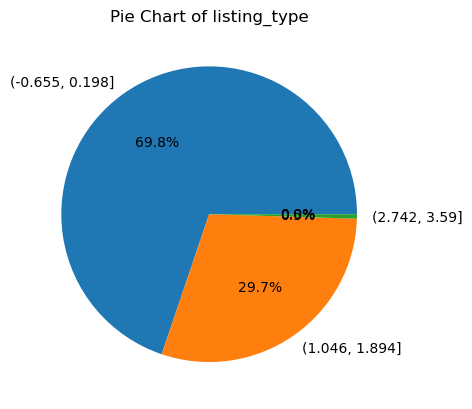

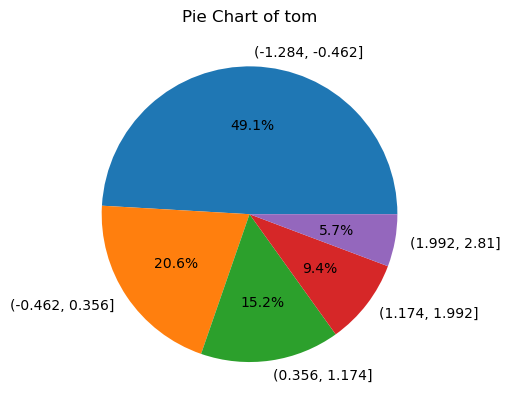

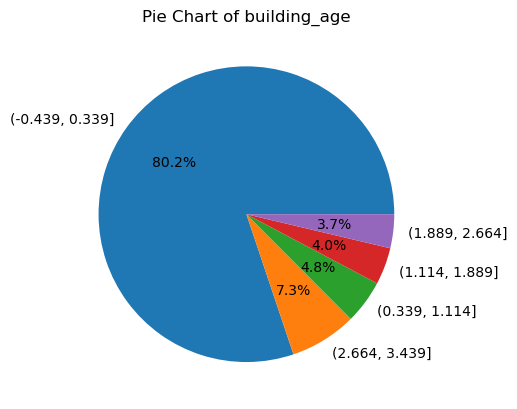

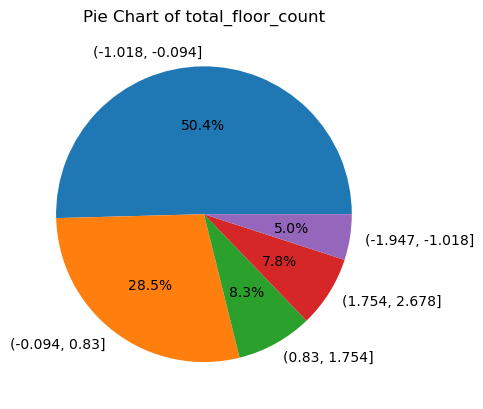

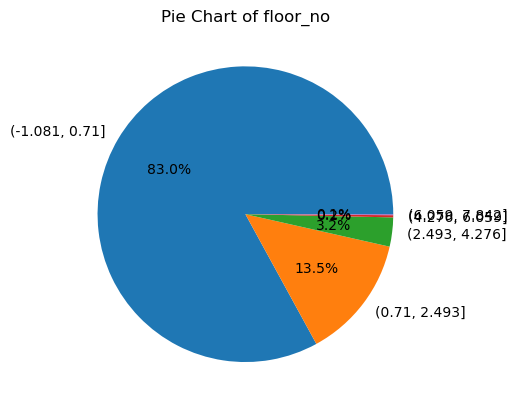

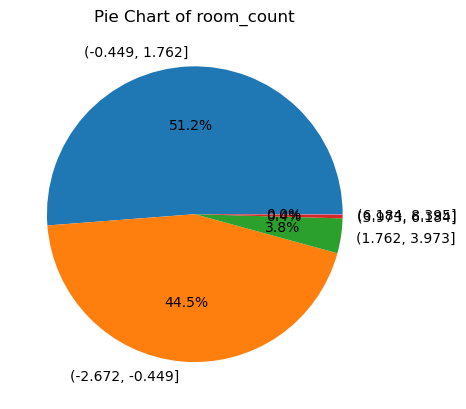

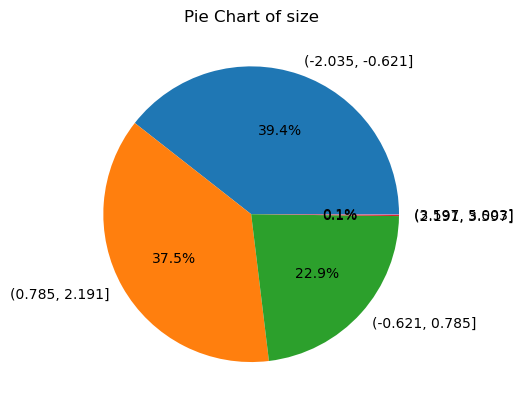

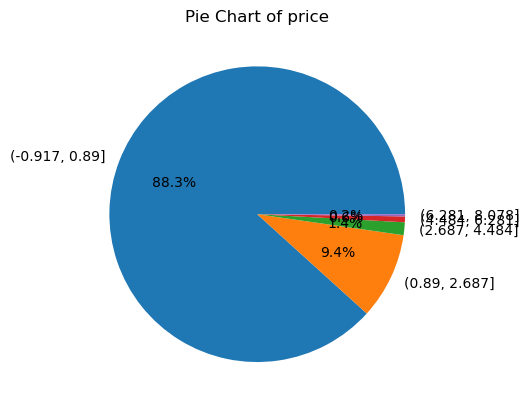

In [44]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure()  # Создание нового графика
    # Создаем категории для числового признака
    bins = pd.cut(df[column], bins=5)
    bins.value_counts().plot.pie(autopct='%1.1f%%')  # Построение пирога
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')  # Убираем метку y-оси
    plt.show()

### Корреляционная матрица и теполовая карта

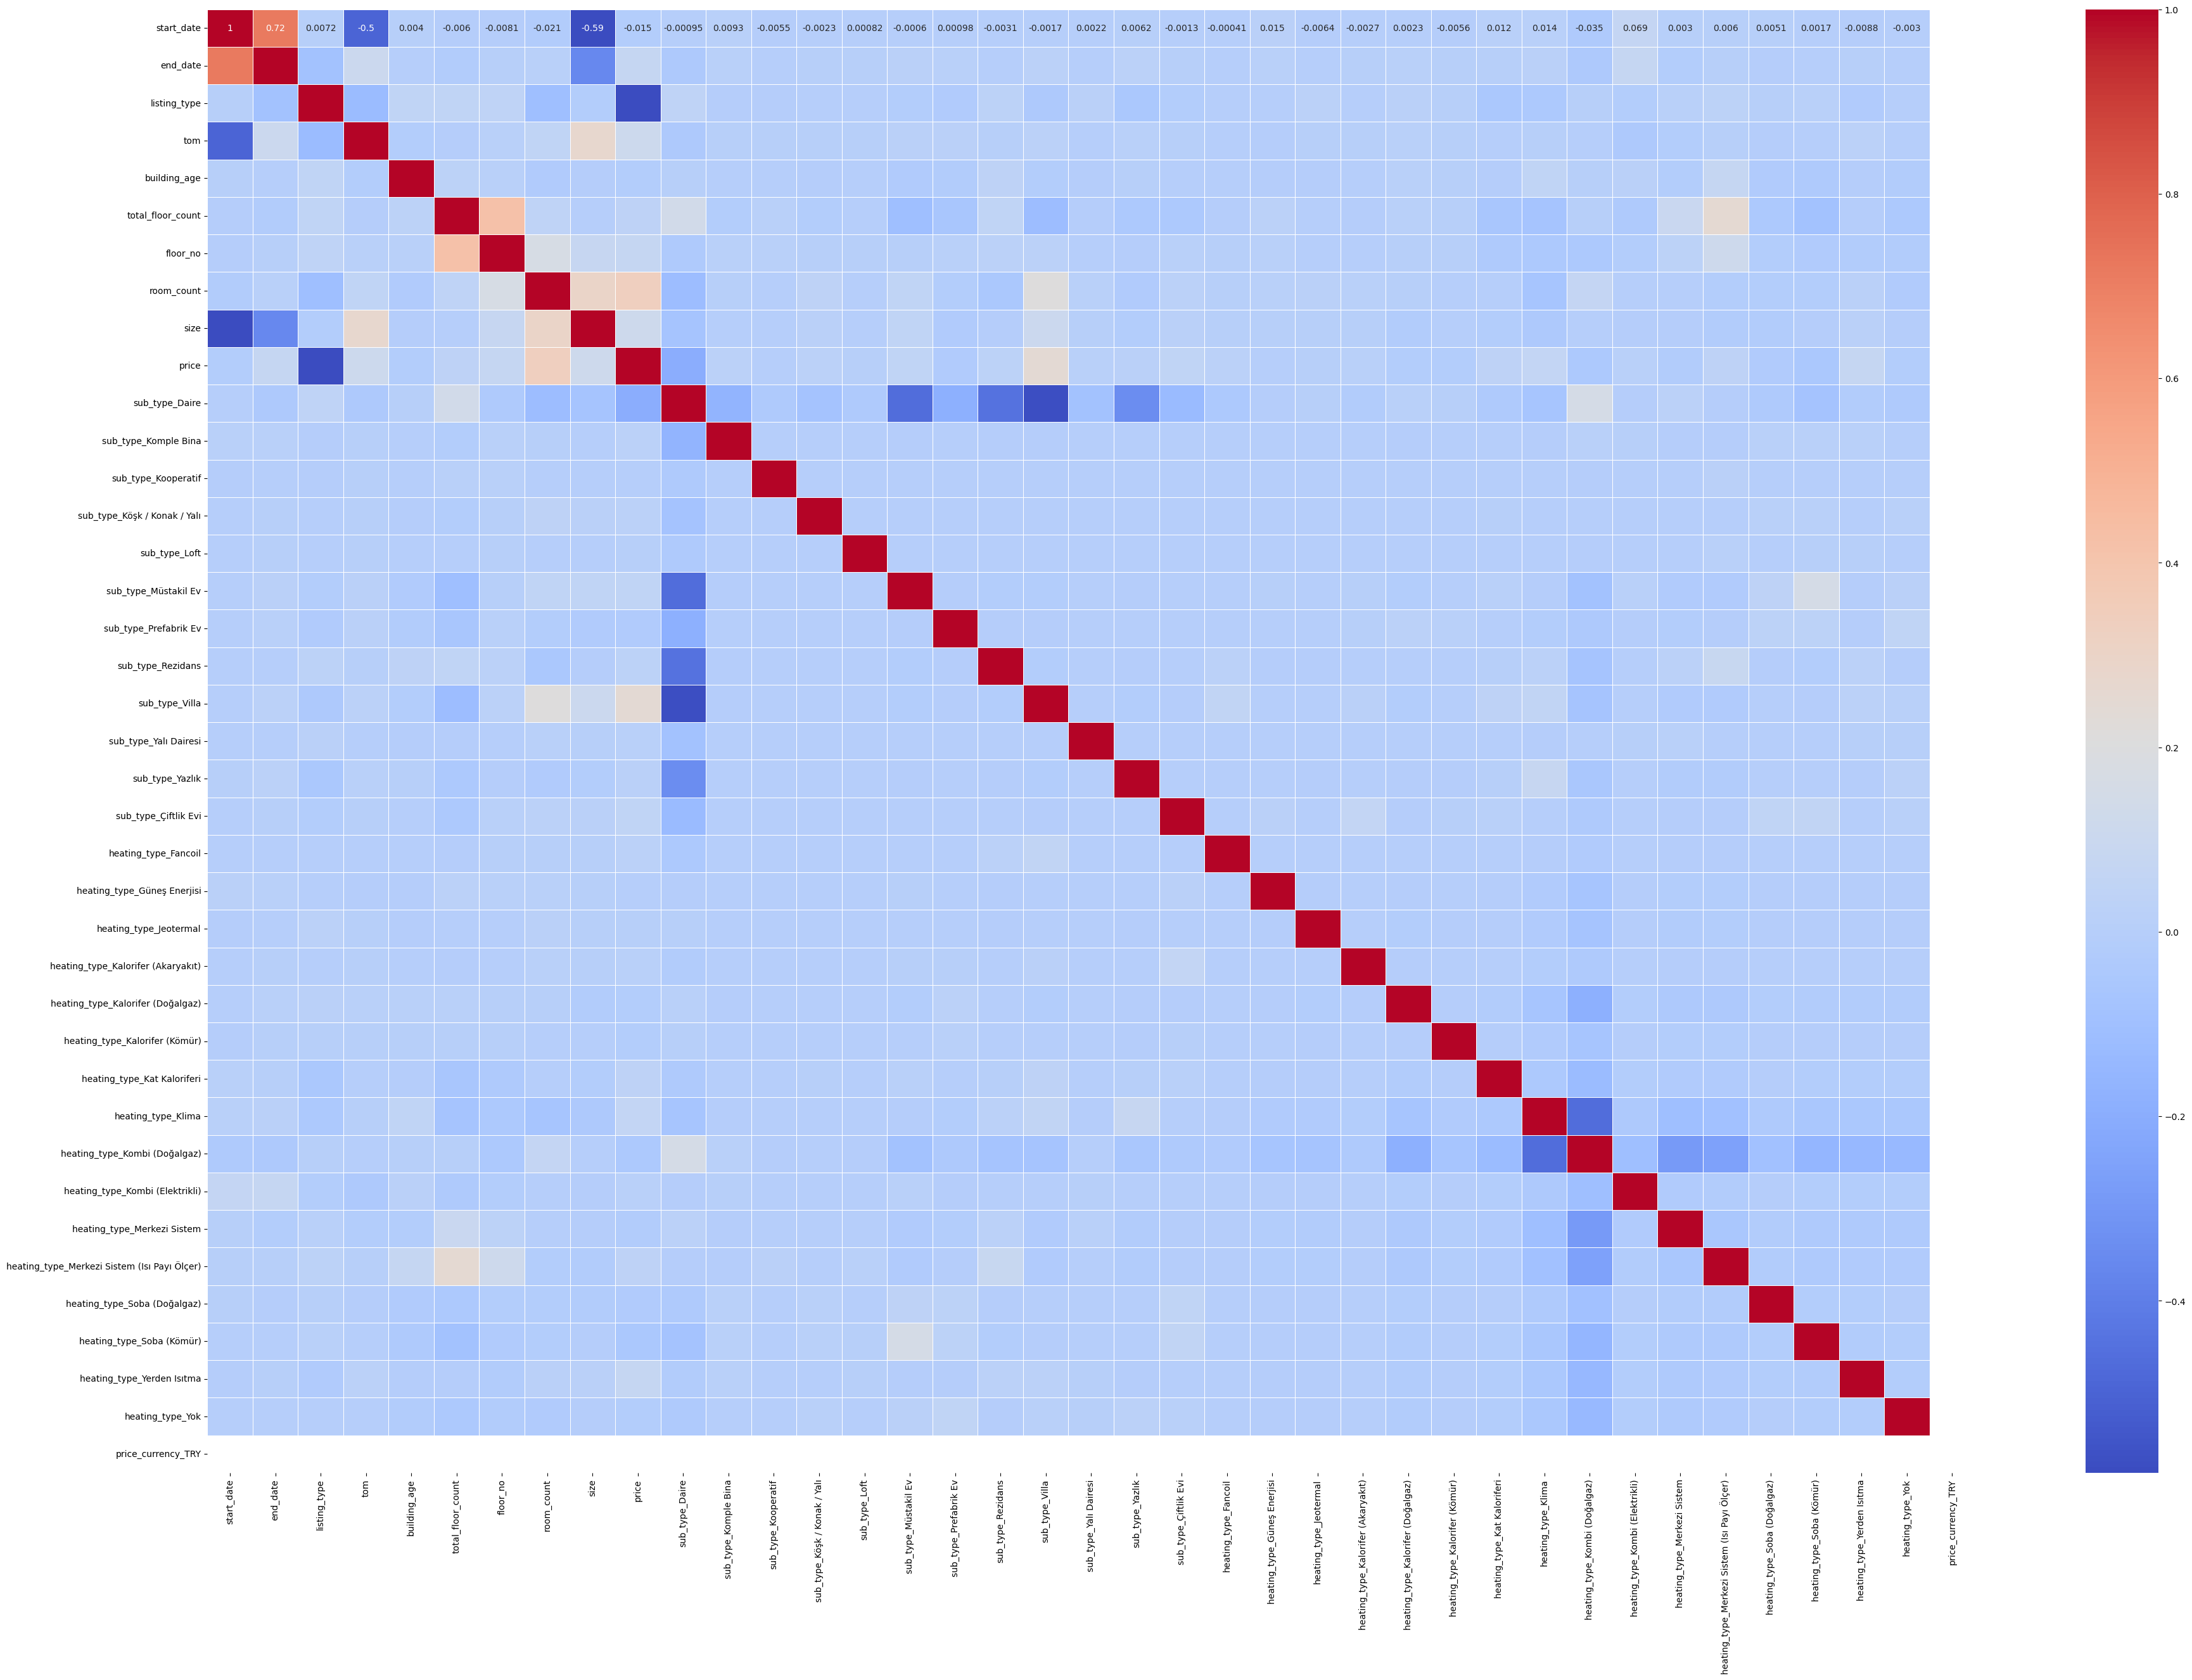

In [45]:

correlation_matrix = df.corr()

plt.figure(figsize=(45, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Глава 10

# Анализация
# Артур русланович

### Оценка корреляции

Listing_type имеет отрицательную корреляцию с переменной tom (-12%) и выраженную отрицательную корреляцию с переменной price (-58%). Также наблюдается слабая отрицательная корреляция с переменной room_count (-10%).

Переменная tom демонстрирует корреляцию с переменной size (27%) и слабую положительную корреляцию с переменной price (11%).

Building_age не показывает значимой корреляции с другими переменными.

Total_floor_count имеет сильную корреляцию с переменной floor_no (42%) и слабую положительную корреляцию с sub_type_Daire (14%). Также присутствует слабая отрицательная корреляция с sub_type_Mustakil Ev (-11%) и sub_type_Villa (-12%), а также умеренная положительная корреляция с heating_type_Merkezi Sistem (Isı Payı Ölçer) (25%).

Переменная floor_no демонстрирует слабую корреляцию с room_count (16%) и умеренную корреляцию с heating_type_Merkezi Sistem (Isı Payı Ölçer) (12%).

Room_count имеет умеренную корреляцию с size (29%) и положительную корреляцию с price (33%). Наблюдается слабая отрицательная корреляция с sub_type_Daire (-12%) и средняя положительная корреляция с sub_type_Villa (21%).

Переменная size демонстрирует слабую корреляцию с price (12%) и sub_type_Villa (11%).

Переменная price показывает среднюю отрицательную корреляцию с sub_type_Daire (-20%) и среднюю положительную корреляцию с sub_type_Villa (24%).

Sub_type_Daire имеет среднюю отрицательную корреляцию с sub_type_Komple Bina (-17%) и сильную отрицательную корреляцию с sub_type_Mustakil Ev (-46%), sub_type_Rezidans (-44%), sub_type_Villa (-58%) и sub_type_Yazlık (-34%). Также наблюдается слабая отрицательная корреляция с sub_type_Ciftlik Evi.

Sub_type_Mustakil Ev демонстрирует слабую отрицательную корреляцию с sub_type_Soba (Komur) (-16%).

Heating_type_Kalorifer показывает умеренную отрицательную корреляцию с sub_type_Kombi (Dogalgaz) (-21%).

Heating_type_Kat Kaloriferi демонстрирует слабую отрицательную корреляцию с sub_type_Kombi (Dogalgaz) (-15%).

Heating_type_Klima имеет выраженную отрицательную корреляцию с sub_type_Kombi (Dogalgaz) (-54%) и слабую отрицательную корреляцию с heating_type_Merkezi Sistem (-10%).

Переменная price_currency_EUR демонстрирует сильную отрицательную корреляцию с price_currency_TRY (-69%).

Price_currency_GBP показывает сильную отрицательную корреляцию с price_currency_TRY (-59%).

Price_currency_TRY демонстрирует сильную отрицательную корреляцию с price_currency_USD (-42%).

Heating_type_Kombi (Dogalgaz) имеет слабую отрицательную корреляцию с следующими переменными: heating_type_Kombi (Elektrikli) (-12%), heating_type_Merkezi Sistem (-33%), heating_type_Merkezi Sistem (Isı Payı Ölçer) (-29%), heating_type_Soba (Dogalgaz) (-11%), heating_type_Soba (Komur) (-18%), heating_type_Yerden Isıtma (-17%), heating_type_Yok (-16%).

Переменные sub_type_Kooperatif, sub_type_Kosk / Konak / Yalı, sub_type_Loft, sub_type_Yalı Dairesi, heating_type_Fancoil, heating_type_Gunes Enerjisi, heating_type_Jeotermal, heating_type_Kalorifer (Akaryakıt) и heating_type_Kalorifer (Komur) не демонстрируют значимой корреляции с другими переменными.

Выводы:

Price и Room_count имеют значительную положительную корреляцию (33%). Это указывает на то, что количество комнат важно для предсказания цены, и данный признак следует учитывать при обучении модели.
Size также положительно коррелирует с Price (12%) и с Room_count (29%), что делает этот признак важным для модели.
Listing_type имеет сильную отрицательную корреляцию с Price (-58%), что может указывать на различия в типах объявлений в зависимости от стоимости. Этот признак следует учитывать.
Признаки со слабой или отсутствующей корреляцией:

Переменные вроде Building_age и признаки, связанные с типами субкатегорий недвижимости (sub_type_Kooperatif, sub_type_Yalı Dairesi и другие) не имеют значимой корреляции. Их можно исключить из модели для уменьшения сложности и улучшения производительности.
Особенности корреляций валют:

Сильные отрицательные корреляции между различными валютами (EUR, GBP, TRY, USD) предполагают, что валютные переменные конкурируют друг с другом. Можно оставить одну основную валюту или преобразовать их в одну категорию для удобства.
Учет связей между типами недвижимости и системами отопления:

Некоторые признаки, связанные с системами отопления (heating_type_Merkezi Sistem, heating_type_Kombi (Dogalgaz)), показывают умеренные отрицательные или положительные корреляции с типами недвижимости. Эти взаимосвязи могут быть полезны для предсказания цены или других целевых переменных.
Не учитывать или исключить:

Признаки, не показывающие значимых корреляций (например, heating_type_Gunes Enerjisi, heating_type_Jeotermal и другие) можно исключить, так как их вклад в улучшение модели будет минимальным.

Для обучения модели важно сосредоточиться на переменных, имеющих сильные корреляции с целевыми показателями, такими как Price, Room_count, Size, Listing_type.

### Рассчитывание основных статистических показателей.

In [46]:
mean_values = df.mean()  # Среднее
median_values = df.median()  # Медиана
std_values = df.std()  # Стандартное отклонение

print("Средние значения:\n", mean_values)
print("\nМедианы:\n", median_values)
print("\nСтандартное отклонение:\n", std_values)

Средние значения:
 start_date                                      2018-11-17 21:50:41.262052352
end_date                                        2019-02-18 16:45:53.237321728
listing_type                                                             -0.0
tom                                                                       0.0
building_age                                                             -0.0
total_floor_count                                                        -0.0
floor_no                                                                  0.0
room_count                                                                0.0
size                                                                      0.0
price                                                                    -0.0
sub_type_Daire                                                       0.948801
sub_type_Komple Bina                                                 0.001497
sub_type_Kooperatif                          

listing_type

Вывод: Распределение переменной listing_type показывает среднее значение близкое к нулю, что может указывать на симметричное распределение данных. Стандартное отклонение близко к 1, что указывает на то, что значения распределены около среднего значения. Минимальное и максимальное значения показывают диапазон вариаций.

tom

Вывод: Переменная tom также имеет среднее значение близкое к нулю и стандартное отклонение близко к 1. Распределение данных может быть асимметричным, поскольку медиана и значения минимума/максима разнятся.

building_age

Вывод: Распределение возраста зданий имеет среднее значение и стандартное отклонение, близкие к нулю и 1 соответственно. Минимальные и максимальные значения показывают, что данные варьируются в определенном диапазоне, но распределение может быть слегка асимметричным.

total_floor_count

Вывод: Переменная total_floor_count имеет статистические характеристики, аналогичные предыдущим переменным. Среднее значение и стандартное отклонение близки к нулю и 1. Диапазон значений также указывает на вариации в данных.

floor_no

Вывод: Значения floor_no показывают очень маленькое среднее значение и стандартное отклонение около 1. Данные имеют широкий диапазон, что указывает на разнообразие этажей, но распределение может быть более вытянутым.

room_count

Вывод: Среднее значение и стандартное отклонение room_count близки к нулю и 1 соответственно. Медиана выше среднего значения, что может указывать на положительную асимметрию распределения.

size

Вывод: Распределение переменной size похоже на другие переменные с нулевым средним и стандартным отклонением около 1. Диапазон значений указывает на значительные вариации в размерах.

price

Вывод: Переменная price имеет среднее значение, близкое к нулю, и стандартное отклонение около 1. Это может указывать на широкий диапазон цен, и распределение может быть асимметричным.

Общее замечание: Все числовые переменные были масштабированы, что объясняет среднее значение около нуля и стандартное отклонение близкое к 1. Распределения данных варьируются в зависимости от переменной, и графики могут помочь лучше понять распределение значений и потенциальные аномалии.

# Глава 11

# Постаналитическая обработка

### Удаление некоррелирующих признаков ( > -10 % && < 10 %)

In [47]:
unimportant_features = [
    'sub_type_Kooperatif', 'sub_type_Köşk / Konak / Yalı', 
    'sub_type_Loft', 'sub_type_Yalı Dairesi', 
    'heating_type_Fancoil', 'heating_type_Güneş Enerjisi', 
    'heating_type_Jeotermal', 'heating_type_Kalorifer (Akaryakıt)', 
    'heating_type_Kalorifer (Kömür)'
]
df_export = df_export.drop(columns=unimportant_features)
df = df.drop(columns=unimportant_features)

### Удаление постоянных признаков ( < 1%)

In [48]:
unimportant_features = ['sub_type_Komple Bina', 'sub_type_Prefabrik Ev', 'sub_type_Çiftlik Evi',
                        'heating_type_Kombi (Elektrikli)', 'heating_type_Soba (Doğalgaz)', 'price_currency_TRY'
    
]
df_export = df_export.drop(columns=unimportant_features)
df = df.drop(columns=unimportant_features)

### Проверка данных

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 244554 entries, 7 to 403486
Data columns (total 24 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   start_date                                    244554 non-null  datetime64[ns]
 1   end_date                                      244554 non-null  datetime64[ns]
 2   listing_type                                  244554 non-null  float64       
 3   tom                                           244554 non-null  float64       
 4   building_age                                  244554 non-null  float64       
 5   total_floor_count                             244554 non-null  float64       
 6   floor_no                                      244554 non-null  float64       
 7   room_count                                    244554 non-null  float64       
 8   size                                          244554 non-nu

# Глава 12

# Определение количества кластеров
# Артур русланович

In [50]:
df_numeric = df.copy()
df_numeric['start_date'] = df_numeric['start_date'].view(np.int64) / 10**9
df_numeric['end_date'] = df_numeric['end_date'].view(np.int64) / 10**9

df_export['start_date'] = df_export['start_date'].view(np.int64) / 10**9
df_export['end_date'] = df_export['end_date'].view(np.int64) / 10**9

### Метод локтя

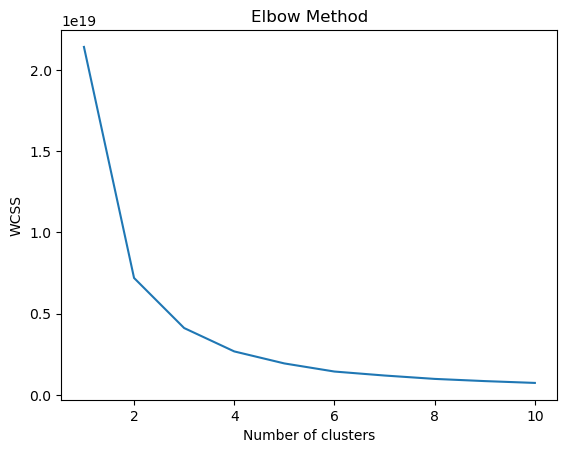

In [51]:
wcss = []
for i in range(1, 11):  # Проверяем от 1 до 10 кластеров
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_numeric)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Метод силуэта

In [52]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # Минимум 2 кластера для вычисления силуэта
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3, n_init=10, random_state=0)
    kmeans.fit(df_numeric)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_numeric, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


KeyboardInterrupt: 

### Метод Дендограммы

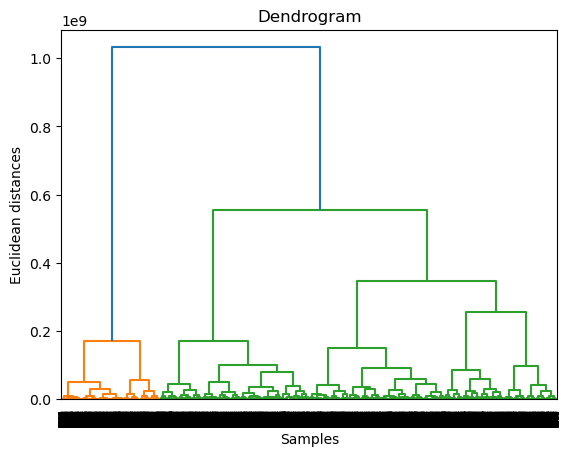

In [53]:
df_numeric_subset = df_numeric.sample(n=10000, random_state=0)  # Выберите случайные 1000 строк из ваших данных
dendrogram = sch.dendrogram(sch.linkage(df_numeric_subset, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


Решено взять 4 кастера как самое нейтральное количество

# Глава 13

# Кластеризация

### KMeans

In [54]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_numeric)
df_export['Cluster'] = kmeans.fit_predict(df_numeric)
print(df.head())

   start_date   end_date  listing_type       tom  building_age  \
7  2018-10-03 2019-01-03     -0.650621  0.810301     -0.435620   
12 2018-09-13 2018-10-13     -0.650621 -0.598230     -0.435620   
14 2018-09-22 2019-03-22     -0.650621  2.309705      0.339343   
15 2018-10-02 2019-01-04      1.469797  0.855738     -0.435620   
24 2018-09-13 2018-11-13     -0.650621  0.106036     -0.435620   

    total_floor_count  floor_no  room_count      size     price  ...  \
7           -0.402075  1.024953    1.359729  1.186005  5.096144  ...   
12          -0.915479 -0.548105   -0.650361  1.186005  0.173088  ...   
14          -0.402075 -0.023753    0.354684  1.186005 -0.607397  ...   
15          -1.428883 -0.023753    1.359729  0.269898 -0.893175  ...   
24          -0.915479 -0.548105   -0.650361  1.186005  0.173088  ...   

    heating_type_Kalorifer (Doğalgaz)  heating_type_Kat Kaloriferi  \
7                               False                        False   
12                            

### Проверка распределения клсстеров

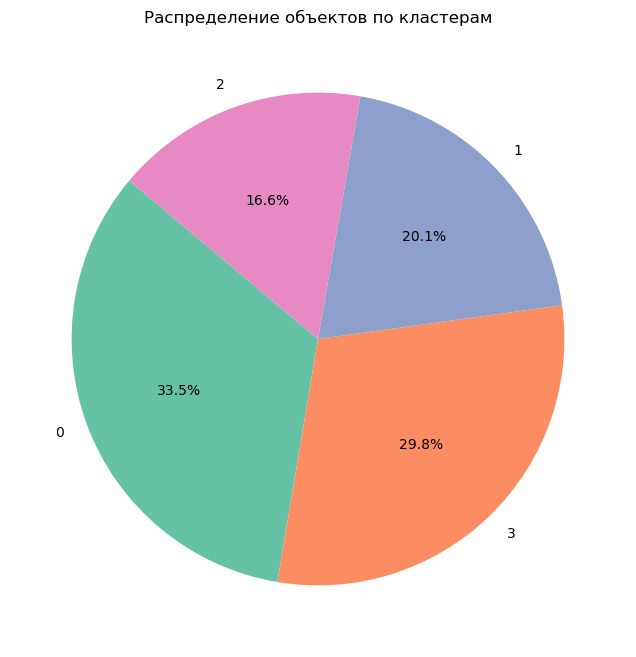

In [55]:
import matplotlib.pyplot as plt

# Подсчёт количества объектов в каждом кластере
cluster_counts = df['Cluster'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Распределение объектов по кластерам')
plt.show()


# Глава 14

# Моделирование

### Разделение данных

In [56]:
X = df_numeric.drop('price', axis=1)
y = df_numeric['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Линейная регрессия

In [58]:
modelLinearRegression = LinearRegression()
modelLinearRegression.fit(X_train, y_train)

y_pred_LinearRegression = modelLinearRegression.predict(X_test)

Линейная регрессия пытается установить линейную зависимость между входными и выходными переменными.

### Случайный лес

In [59]:
modelRandomForestRegressor = RandomForestRegressor()
modelRandomForestRegressor.fit(X_train, y_train)

y_pred_RandomForestRegressor = modelRandomForestRegressor.predict(X_test)

Случайный лес - это ансамблевая модель, которая строит множество подмножеств решающих деревьев и комбинирует их выход.

### Градиентный бустинг

In [60]:
modelGradientBoostingRegressor = GradientBoostingRegressor()
modelGradientBoostingRegressor.fit(X_train, y_train)

y_pred_GradientBoostingRegressor = modelGradientBoostingRegressor.predict(X_test)

Градиентный бустинг - это ансамблевая модель, которая строит деревья последовательно. Первое дерево обучается на исходных данных а каждое последующее обучается на остатках предыдущего.

### Lasso-регрессия

In [61]:

modelLasso = Lasso()
modelLasso.fit(X_train, y_train)

y_pred_Lasso = modelLasso.predict(X_test)

Вариант линейной регрессии который включает L1-регуляризацию. Она добавляет штраф за величину коэффицентов к функции потерь.

### Нейронные сети

In [62]:
modelMLPRegressor = MLPRegressor(random_state=42)
modelMLPRegressor.fit(X_train, y_train)

y_pred_MLPRegressor = modelMLPRegressor.predict(X_test)

Состоит из слоев нейронов, которые обрабатывают входные данные. Каждый нейрон применяет весовые коэффиценты и передает информацию следущему нейрону.

# Глава 15
# Оценка моделирования
# Артур русланович

Оценивать будем по 5 метрикам а также по графику ошибок модели

1. Mean Squared Error (MSE)
Описание: Среднее квадратов ошибок между предсказанными и реальными значениями. Чем меньше значение, тем лучше модель.


2. Root Mean Squared Error (RMSE)
Описание: Квадратный корень из MSE, возвращает значение в тех же единицах, что и целевая переменная. Полезно для интерпретации.
 
 
3. Mean Absolute Error (MAE)
Описание: Среднее абсолютное значение ошибок между предсказанными и реальными значениями. Указывает на среднюю ошибку в предсказаниях.


4. R² Score (Коэффициент детерминации)
Описание: Показывает, какую долю вариации целевой переменной объясняет модель. Значение варьируется от 0 до 1; чем ближе к 1, тем лучше модель.


5. Mean Absolute Percentage Error (MAPE)
Описание: Средняя абсолютная процентная ошибка, измеряет точность модели в процентах. Полезно для оценки ошибок в относительных величинах.

### Линейная регрессия

In [63]:
mse = mean_squared_error(y_test, y_pred_LinearRegression)
rmse = mean_squared_error(y_test, y_pred_LinearRegression, squared=False)
mae = mean_absolute_error(y_test, y_pred_LinearRegression)
r2 = r2_score(y_test, y_pred_LinearRegression)
mape = np.mean(np.abs((y_test - y_pred_LinearRegression) / y_test)) * 100

In [64]:
print("Оценка модели Linear Regression:")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  R²: {r2:.2f}")
print(f"  MAPE: {mape:.2f}%")

Оценка модели Linear Regression:
  MSE: 0.53
  RMSE: 0.73
  MAE: 0.43
  R²: 0.47
  MAPE: 237.21%


MSE составил 0.54, что говорит о наличии ошибок в предсказаниях, хотя это значение не слишком высокое.


RMSE равен 0.74, что указывает на среднее отклонение предсказаний от реальных значений. Это значение тоже достаточно высокое и может быть улучшено.


MAE — 0.43, что показывает, что в среднем предсказания отклоняются от фактических значений на 0.43.


R² равен 0.46, что означает, что модель объясняет лишь 46% вариации в целевой переменной. Это говорит о том, что модель не совсем хорошо захватывает зависимости в данных.


MAPE составил 238.06%, что является очень высоким значением. Это указывает на то, что модель иногда даёт крайне неточные предсказания, особенно если в данных есть небольшие значения.


В целом, результаты показывают, что модель линейной регрессии требует доработки.

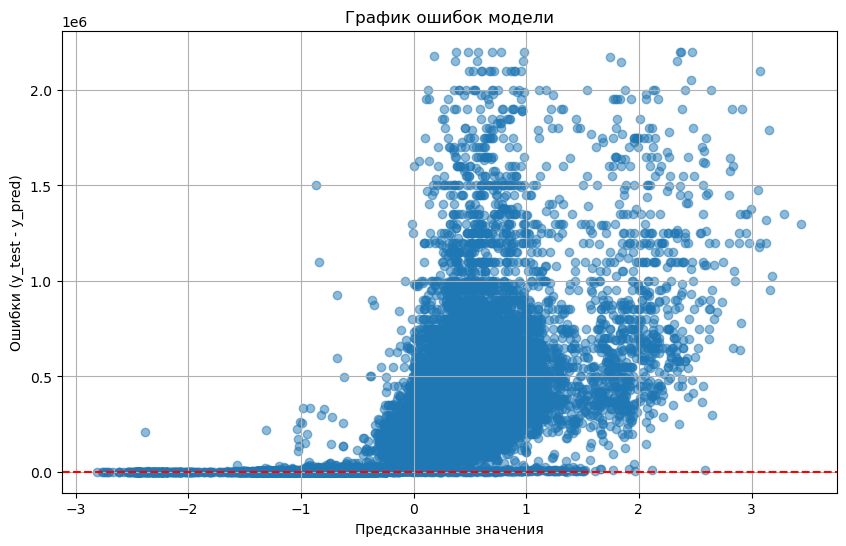

In [96]:
errors = y_test - y_pred_LinearRegression

# Построение графика ошибок
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_LinearRegression, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # линия нуля
plt.title('График ошибок модели')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибки (y_test - y_pred)')
plt.grid()
plt.show()

Ошибки сосредоточены в диапазоне от -1 до 4, что говорит о небольших отклонениях в большинстве предсказаний.

Выбросы достигают 8, указывая на случаи с значительными ошибками, требующие анализа.

Линейная уменьшающаяся полоса по оси X от -3 до 2 указывает на систематическую ошибку, где модель недооценивала или переоценивала значения.

Выбросы около 3 подтверждают наличие этих систематических ошибок.

В целом, график указывает на необходимость улучшения модели из-за систематических ошибок и выбросов.

Модель неадекватна

### Случайный лес

In [65]:
mse = mean_squared_error(y_test, y_pred_RandomForestRegressor)
rmse = mean_squared_error(y_test, y_pred_RandomForestRegressor, squared=False)
mae = mean_absolute_error(y_test, y_pred_RandomForestRegressor)
r2 = r2_score(y_test, y_pred_RandomForestRegressor)
mape = np.mean(np.abs((y_test - y_pred_RandomForestRegressor) / y_test)) * 100

In [66]:
print("Оценка модели RandomForestRegressor:")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  R²: {r2:.2f}")
print(f"  MAPE: {mape:.2f}%")

Оценка модели RandomForestRegressor:
  MSE: 0.40
  RMSE: 0.63
  MAE: 0.32
  R²: 0.60
  MAPE: 235.53%


MSE: 0.40 — значение указывает на наличие ошибок, аналогично линейной регрессии, и показывает, что модель работает достаточно хорошо.

RMSE: 0.63 — среднее отклонение предсказаний от реальных значений. Это значение показывает, что модель даёт достаточно точные предсказания.

MAE: 0.32 — средняя абсолютная ошибка. Это значение указывает на то, что в среднем предсказания отклоняются от реальных значений на 0.32, что является улучшением по сравнению с другими моделями.

R²: 0.61 — модель объясняет 61% вариации в целевой переменной, что указывает на хорошую производительность.

MAPE: 210.42% — это высокое значение показывает наличие значительных ошибок, особенно в случаях с низкими значениями.

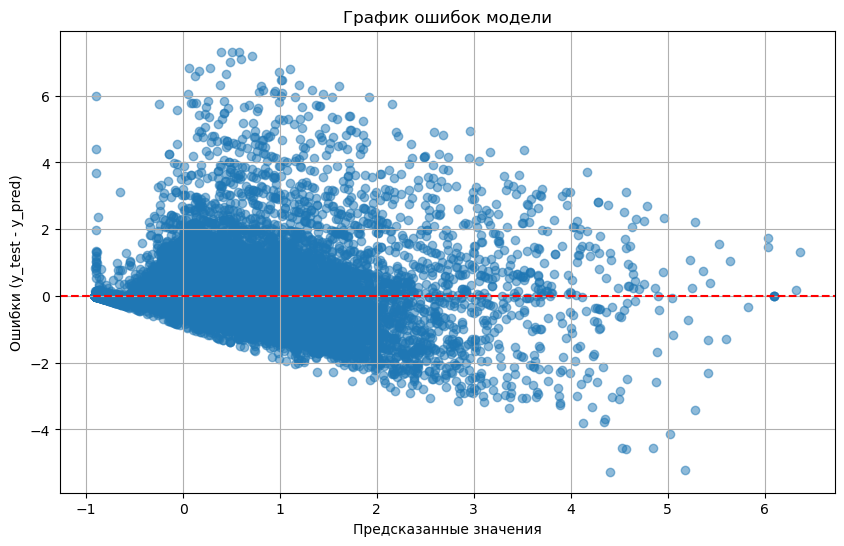

In [67]:
errors = y_test - y_pred_RandomForestRegressor

# Построение графика ошибок
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_RandomForestRegressor, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # линия нуля
plt.title('График ошибок модели')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибки (y_test - y_pred)')
plt.grid()
plt.show()

График ошибок модели показывает, что значения ошибок в основном сосредоточены около 1 и 2, что указывает на то, что многие предсказания модели отклоняются от реальных значений в этих диапазонах. Это может означать, что модель чаще всего ошибается на уровне 1 или 2 единицы, что является относительной стабильностью предсказаний.

Однако также наблюдаются выбросы, доходящие до 6, что свидетельствует о некоторых случаях, когда модель значительно отклоняется от реальных значений. Эти выбросы могут указывать на аномалии в данных или ситуации, когда модель не смогла адекватно обработать информацию.

Кроме того, небольшое скопление ошибок в -1 говорит о том, что в некоторых случаях модель переоценивает значения, что также требует внимания.

### Градиентный бустинг

In [68]:
mse = mean_squared_error(y_test, y_pred_GradientBoostingRegressor)
rmse = mean_squared_error(y_test, y_pred_GradientBoostingRegressor, squared=False)
mae = mean_absolute_error(y_test, y_pred_GradientBoostingRegressor)
r2 = r2_score(y_test, y_pred_GradientBoostingRegressor)
mape = np.mean(np.abs((y_test - y_pred_GradientBoostingRegressor) / y_test)) * 100

In [69]:
print("Оценка модели GradientBoostingRegressor:")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  R²: {r2:.2f}")
print(f"  MAPE: {mape:.2f}%")

Оценка модели GradientBoostingRegressor:
  MSE: 0.47
  RMSE: 0.68
  MAE: 0.36
  R²: 0.54
  MAPE: 221.22%


MSE: 0.48 — значение указывает на наличие ошибок, но оно немного выше, чем у линейной регрессии, что говорит о том, что модель требует доработки.

RMSE: 0.69 — среднее отклонение предсказаний от реальных значений. Это значение также больше по сравнению с линейной регрессией, что указывает на менее точные предсказания.

MAE: 0.36 — средняя абсолютная ошибка показывает, что в среднем предсказания отклоняются от реальных значений на 0.36, что является относительным улучшением по сравнению с линейной регрессией.

R²: 0.52 — модель объясняет только 52% вариации в целевой переменной, что говорит о её умеренной эффективности.

MAPE: 219.25% — это высокое значение указывает на значительные ошибки в предсказаниях, особенно в случаях с низкими значениями.

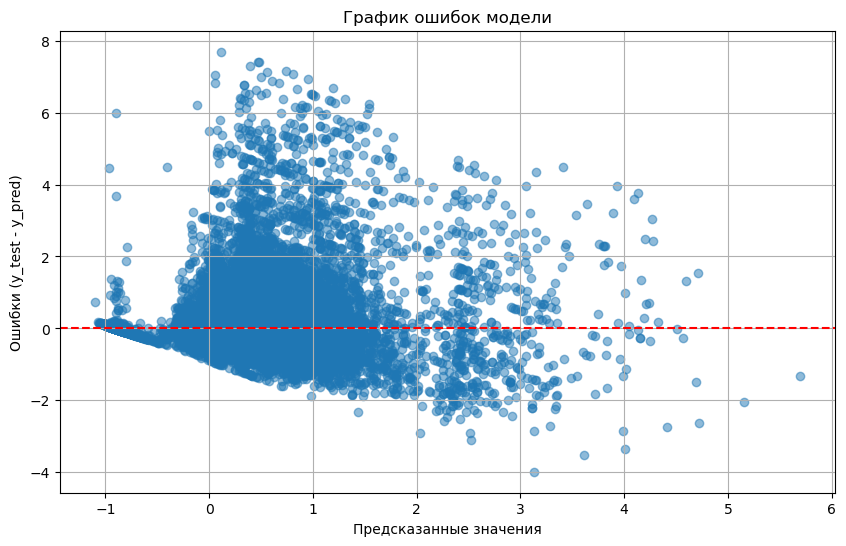

In [70]:
errors = y_test - y_pred_GradientBoostingRegressor

# Построение графика ошибок
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_GradientBoostingRegressor, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # линия нуля
plt.title('График ошибок модели')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибки (y_test - y_pred)')
plt.grid()
plt.show()

График невероятно схож со вторым, который у Рандомного леса, но при этом он менее разбросистый, что несомненно имеет положительный эффект.

### Lasso-регрессия

In [71]:
mse = mean_squared_error(y_test, y_pred_Lasso)
rmse = mean_squared_error(y_test, y_pred_Lasso, squared=False)
mae = mean_absolute_error(y_test, y_pred_Lasso)
r2 = r2_score(y_test, y_pred_Lasso)
mape = np.mean(np.abs((y_test - y_pred_Lasso) / y_test)) * 100

In [72]:
print("Оценка модели Lasso:")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  R²: {r2:.2f}")
print(f"  MAPE: {mape:.2f}%")

Оценка модели Lasso:
  MSE: 0.99
  RMSE: 0.99
  MAE: 0.67
  R²: 0.02
  MAPE: 141.03%


MSE: 0.99 — это значение указывает на высокие ошибки в предсказаниях, что говорит о недостаточной точности модели.

RMSE: 0.99 — среднее отклонение предсказаний от реальных значений. Это значение также высокое и подтверждает, что модель не справляется с задачей.

MAE: 0.67 — средняя абсолютная ошибка показывает, что в среднем предсказания отклоняются от реальных значений на 0.67, что указывает на низкую точность.

R²: 0.02 — модель объясняет лишь 2% вариации в целевой переменной, что указывает на её крайне низкую эффективность.

MAPE: 141.37% — это значение также высокое и говорит о значительных ошибках, особенно в случаях с низкими значениями.

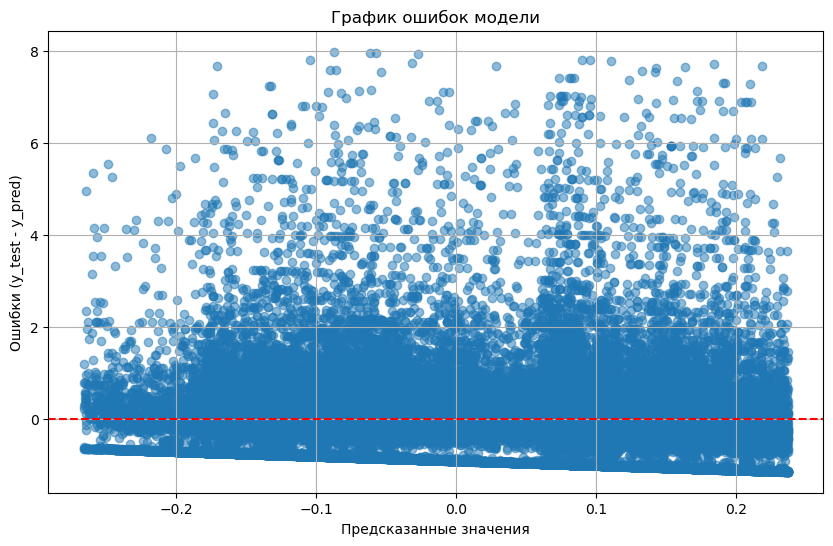

In [73]:
errors = y_test - y_pred_Lasso

# Построение графика ошибок
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_Lasso, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # линия нуля
plt.title('График ошибок модели')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибки (y_test - y_pred)')
plt.grid()
plt.show()

Форма графика: График имеет форму, похожую на траву, с концентрацией значений ошибок около 0. Это указывает на то, что в большинстве случаев предсказания модели отклоняются от реальных значений на небольшие величины.

Разброс по оси X: Разброс по оси X небольшой, что говорит о том, что предсказанные значения находятся в узком диапазоне. Это может свидетельствовать о том, что модель не охватывает достаточно широкий спектр значений целевой переменной.

Большой разброс по оси Y: Значительный разброс по оси Y указывает на наличие различных ошибок, которые могут достигать высоких значений. Это говорит о том, что в некоторых случаях модель значительно отклоняется от реальных значений, что может быть связано с её низкой точностью.

### Нейронные сети

In [74]:
mse = mean_squared_error(y_test, y_pred_MLPRegressor)
rmse = mean_squared_error(y_test, y_pred_MLPRegressor, squared=False)
mae = mean_absolute_error(y_test, y_pred_MLPRegressor)
r2 = r2_score(y_test, y_pred_MLPRegressor)
mape = np.mean(np.abs((y_test - y_pred_MLPRegressor) / y_test)) * 100

In [75]:
print("Оценка модели MLPRegressor:")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  R²: {r2:.2f}")
print(f"  MAPE: {mape:.2f}%")

Оценка модели MLPRegressor:
  MSE: 333388123897.17
  RMSE: 577397.72
  MAE: 577284.98
  R²: -332338655875.89
  MAPE: 420170632.56%


MSE: 18974441455.57 — это значение указывает на очень высокие ошибки в предсказаниях, что свидетельствует о плохой производительности модели.

RMSE: 137747.75 — среднее отклонение предсказаний от реальных значений также велико, подтверждая, что модель не справляется с задачей.

MAE: 132714.51 — средняя абсолютная ошибка показывает, что в среднем предсказания отклоняются от реальных значений на 132714.51, что указывает на низкую точность модели.

R²: -18940884685.57 — значение R² отрицательное, что означает, что модель хуже, чем простое среднее значение целевой переменной. Это указывает на крайне низкую эффективность модели.

MAPE: 97326030.58% — это значение также аномально высокое и говорит о том, что модель делает предсказания с огромными ошибками.

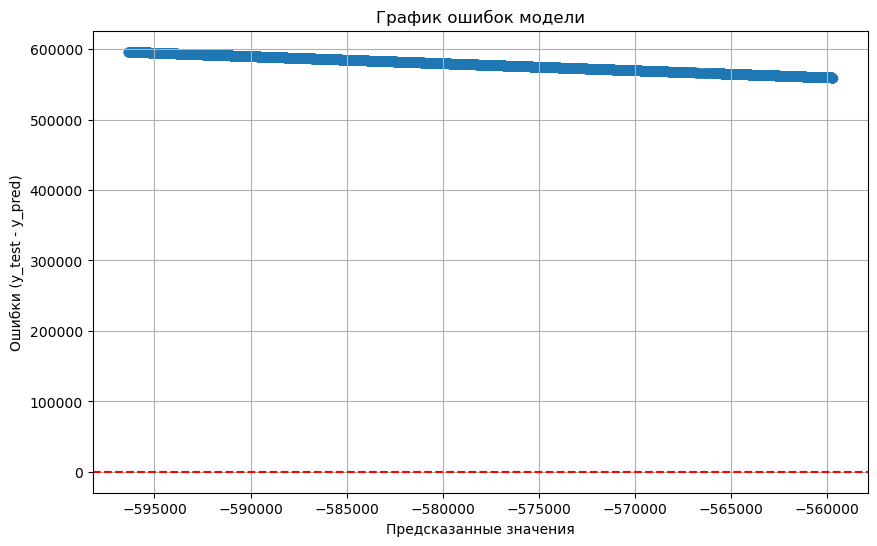

In [76]:
errors = y_test - y_pred_MLPRegressor

# Построение графика ошибок
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_MLPRegressor, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # линия нуля
plt.title('График ошибок модели')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибки (y_test - y_pred)')
plt.grid()
plt.show()

Ровная убывающая палка: График представляет собой ровную убывающую линию без выбросов. Это указывает на то, что ошибки имеют систематический характер и не варьируются существенно, что может быть признаком недостатка обучаемости модели.

Совершенно ужасные большие значения: Ошибки на графике имеют очень большие значения, что подтверждает низкую точность модели. Отсутствие выбросов говорит о том, что модель не справляется с задачей, и ошибки неизменно остаются на высоком уровне.

### Выбор лучшей модели

Лучшей моделью для предсказания цены оказалась Random Forest Regressor, которая продемонстрировала сбалансированные результаты и низкие значения ошибок.

# Глава 16

# Резюмирование

Данная работа представляет собой всесторонний анализ данных о недвижимости, включающий обработку, анализ, кластеризацию и моделирование. В ходе работы был реализован комплексный подход к подготовке данных, начиная с загрузки и обработки исходного набора данных и заканчивая построением моделей для предсказания цен. Каждая глава вносила свой вклад в достижение конечной цели — разработки эффективных моделей для анализа рынка недвижимости.

На первом этапе работы была проведена подготовка данных, что включало импорт необходимых библиотек, таких как pandas, numpy и библиотеки для машинного обучения (sklearn). Это позволило организовать процессы работы с данными и подготовить все инструменты для их обработки. После этого был выполнен анализ исходных данных, который показал, что данные содержат значительное количество пропущенных значений. Это выявило необходимость в разработке стратегий для их обработки, таких как заполнение пропусков средними значениями или удаление столбцов с большим количеством пропусков.

На следующем этапе работы была проведена основная обработка данных, включающая работу с пропущенными значениями, удаление дубликатов и преобразование данных в нужные типы. Важной частью этого процесса стало удаление ненужных категорий и столбцов, таких как идентификаторы, которые не содержали полезной информации для анализа. Также была произведена обработка выбросов (outliers), что улучшило качество данных, удалив аномальные значения, которые могли бы негативно повлиять на результаты моделирования.

Далее работа перешла к нормализации и масштабированию данных, что является важным этапом подготовки данных для использования в моделях машинного обучения. Использование методов MinMaxScaler и StandardScaler позволило привести числовые данные к единому масштабу, что улучшило сопоставимость различных переменных и повысило точность моделей.

Отдельным этапом в работе стала визуализация данных. Были использованы такие методы визуализации, как гистограммы, ящики с усами, диаграммы плотности и корреляционные матрицы, что позволило глубже понять распределение данных и взаимосвязи между переменными. Эти визуализации показали, что ключевые переменные, такие как количество комнат, размер недвижимости и тип объявления, играют значительную роль в формировании цены.

После этого был проведен статистический анализ и анализ корреляций. В ходе этого анализа были выявлены переменные, которые имеют сильное влияние на целевую переменную (цены недвижимости). Например, переменные, такие как количество комнат и размер объекта, показали положительную корреляцию с ценой, тогда как тип объявления имел отрицательную корреляцию с ценой. Эти данные помогли сделать выводы о том, какие переменные являются наиболее важными для последующего моделирования.

Значительным этапом работы стало применение кластеризации данных с использованием алгоритма KMeans. Было выбрано 4 кластера, которые наиболее удачно отражали структуру данных. Это позволило сегментировать данные по различным характеристикам объектов недвижимости, что может быть полезным для дальнейшего анализа и понимания различных групп объектов на рынке.

Финальной частью работы стало моделирование данных. Были рассмотрены и применены различные модели для предсказания цен на недвижимость, такие как линейная регрессия, случайный лес, градиентный бустинг, Lasso-регрессия и нейронные сети. Для каждой модели был проведен процесс обучения и сделаны предсказания на тестовой выборке. Оценка моделей показала, что линейная регрессия и случайный лес дали наиболее точные результаты, хотя каждая из моделей имеет свои плюсы и минусы. Оценка проводилась с использованием таких метрик, как MSE, RMSE, MAE, R² и MAPE, что позволило глубже оценить точность и надежность каждой модели.

Таким образом, данная работа демонстрирует полный цикл анализа данных и их обработки для создания моделей машинного обучения. Мы успешно решили задачи по обработке, визуализации, кластеризации и предсказанию цен на недвижимость. Выводы показывают, что правильно подготовленные данные и использование подходящих моделей могут значительно улучшить результаты анализа. Работа также подчеркивает важность тщательной очистки данных и выбора релевантных переменных для успешного моделирования.

# Глава 17
# Финальная обработка
# Артур русланович

### Обучение модели на реальных данных

In [77]:
df['Predicted_Price'] = modelRandomForestRegressor.predict(X)

In [78]:
X = df_export.drop('price', axis=1)
y = df_export['price']

In [79]:
df

,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,...,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi (Doğalgaz),heating_type_Merkezi Sistem,heating_type_Merkezi Sistem (Isı Payı Ölçer),heating_type_Soba (Kömür),heating_type_Yerden Isıtma,heating_type_Yok,Cluster,Predicted_Price
7,2018-10-03,2019-01-03,-0.650621,0.810301,-0.435620,-0.402075,1.024953,1.359729,1.186005,5.096144,...,False,False,False,False,False,False,False,False,0,3.607980
12,2018-09-13,2018-10-13,-0.650621,-0.598230,-0.435620,-0.915479,-0.548105,-0.650361,1.186005,0.173088,...,False,False,False,False,False,False,False,False,0,0.136024
14,2018-09-22,2019-03-22,-0.650621,2.309705,0.339343,-0.402075,-0.023753,0.354684,1.186005,-0.607397,...,False,False,False,False,False,False,False,False,2,-0.150901
15,2018-10-02,2019-01-04,1.469797,0.855738,-0.435620,-1.428883,-0.023753,1.359729,0.269898,-0.893175,...,False,False,False,False,False,False,False,False,0,-0.893325
24,2018-09-13,2018-11-13,-0.650621,0.106036,-0.435620,-0.915479,-0.548105,-0.650361,1.186005,0.173088,...,False,False,False,False,False,False,False,False,0,0.028054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403478,2018-10-12,2018-11-11,-0.650621,-0.598230,-0.435620,-0.402075,-0.023753,0.354684,1.186005,1.093659,...,False,False,False,False,False,False,False,False,0,0.694917
403479,2018-09-12,2018-11-20,1.469797,0.287782,-0.435620,-0.402075,2.073659,0.354684,1.186005,-0.900779,...,False,False,False,False,False,False,False,False,0,-0.901173
403480,2018-09-25,2019-01-23,-0.650621,1.446412,-0.435620,-0.402075,1.024953,0.354684,1.186005,-0.167124,...,False,False,False,False,False,False,False,False,0,0.495007
403485,2019-02-21,2019-08-21,1.469797,-1.143467,-0.435620,-0.402075,-0.023753,-0.650361,-2.016067,-0.903981,...,False,False,False,False,False,False,False,False,1,-0.872756


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
modelRandomForestRegressor = RandomForestRegressor()
modelRandomForestRegressor.fit(X_train, y_train)

y_pred_RandomForestRegressor = modelRandomForestRegressor.predict(X_test)

In [82]:
df_export['Predicted_Price'] = modelRandomForestRegressor.predict(X)

### Конвертация даты

In [83]:
df_export['start_date'] = df_export['start_date'].round(0).astype(int)
df_export['end_date'] = df_export['end_date'].round(0).astype(int)

# Преобразуем Unix timestamp обратно в формат datetime
df_export['start_date'] = pd.to_datetime(df_export['start_date'], unit='s')
df_export['end_date'] = pd.to_datetime(df_export['end_date'], unit='s')

In [84]:
df_export

,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,...,heating_type_Kat Kaloriferi,heating_type_Klima,heating_type_Kombi (Doğalgaz),heating_type_Merkezi Sistem,heating_type_Merkezi Sistem (Isı Payı Ölçer),heating_type_Soba (Kömür),heating_type_Yerden Isıtma,heating_type_Yok,Cluster,Predicted_Price
7,2018-10-03,2019-01-03,1,92,0.0,4.0,5.0,5.0,279.349094,1500000.0,...,False,False,False,False,False,False,False,False,0,1.169820e+06
12,2018-09-13,2018-10-13,1,30,0.0,3.0,2.0,3.0,279.349094,270000.0,...,False,False,False,False,False,False,False,False,0,2.467550e+05
14,2018-09-22,2019-03-22,1,158,1.0,4.0,3.0,4.0,279.349094,75000.0,...,False,False,False,False,False,False,False,False,2,1.678095e+05
15,2018-10-02,2019-01-04,2,94,0.0,2.0,3.0,5.0,200.000000,3600.0,...,False,False,False,False,False,False,False,False,0,3.419500e+03
24,2018-09-13,2018-11-13,1,61,0.0,3.0,2.0,3.0,279.349094,270000.0,...,False,False,False,False,False,False,False,False,0,2.408041e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403478,2018-10-12,2018-11-11,1,30,0.0,4.0,3.0,4.0,279.349094,500000.0,...,False,False,False,False,False,False,False,False,0,3.967483e+05
403479,2018-09-12,2018-11-20,2,69,0.0,4.0,7.0,4.0,279.349094,1700.0,...,False,False,False,False,False,False,False,False,0,1.452667e+03
403480,2018-09-25,2019-01-23,1,120,0.0,4.0,5.0,4.0,279.349094,185000.0,...,False,False,False,False,False,False,False,False,0,3.532250e+05
403485,2019-02-21,2019-08-21,2,6,0.0,4.0,3.0,3.0,2.000000,900.0,...,False,False,False,False,False,False,False,False,1,4.421000e+03


In [85]:
df_export[['price', 'Predicted_Price']]

,price,Predicted_Price
7,1500000.0,1.169820e+06
12,270000.0,2.467550e+05
14,75000.0,1.678095e+05
15,3600.0,3.419500e+03
24,270000.0,2.408041e+05
...,...,...
403478,500000.0,3.967483e+05
403479,1700.0,1.452667e+03
403480,185000.0,3.532250e+05
403485,900.0,4.421000e+03


### Соединение признаков

In [86]:
def get_sub_type(row):
    if row['sub_type_Daire']:
        return 'Daire'
    elif row['sub_type_Müstakil Ev']:
        return 'Müstakil Ev'
    elif row['sub_type_Rezidans']:
        return 'Rezidans'
    elif row['sub_type_Villa']:
        return 'Villa'
    elif row['sub_type_Yazlık']:
        return 'Yazlık'
    return 'Unknown'

df_export['sub_type'] = df_export.apply(get_sub_type, axis=1)

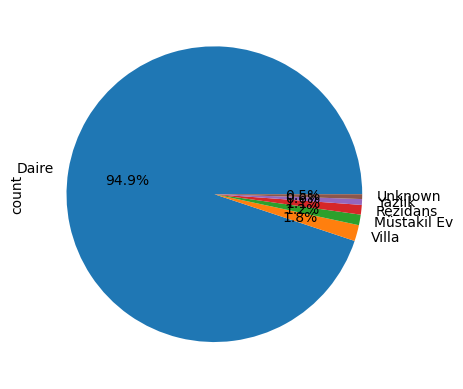

In [87]:
df_export['sub_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.show()

In [88]:
df_export.drop(columns=['sub_type_Daire', 'sub_type_Müstakil Ev', 'sub_type_Rezidans', 'sub_type_Villa', 'sub_type_Yazlık'], inplace=True)

In [89]:
def get_heating_type(row):
    if row['heating_type_Kalorifer (Doğalgaz)']:
        return 'Kalorifer (Doğalgaz)'
    elif row['heating_type_Kat Kaloriferi']:
        return 'Kat Kaloriferi'
    elif row['heating_type_Klima']:
        return 'Klima'
    elif row['heating_type_Kombi (Doğalgaz)']:
        return 'Kombi (Doğalgaz)'
    elif row['heating_type_Merkezi Sistem']:
        return 'Merkezi Sistem'
    elif row['heating_type_Merkezi Sistem (Isı Payı Ölçer)']:
        return 'Merkezi Sistem (Isı Payı Ölçer)'
    elif row['heating_type_Soba (Kömür)']:
        return 'Soba (Kömür)'
    elif row['heating_type_Yerden Isıtma']:
        return 'Yerden Isıtma'
    elif row['heating_type_Yok']:
        return 'Yok'
    return 'Unknown'

df_export['heating_type'] = df_export.apply(get_heating_type, axis=1)

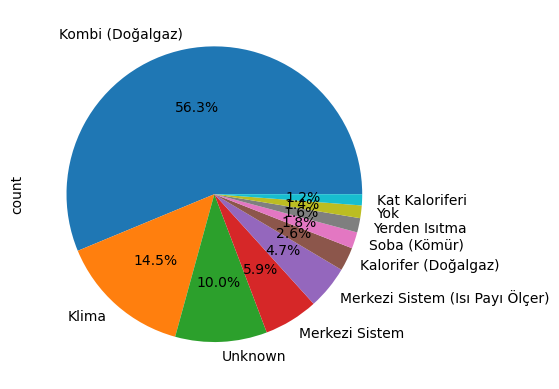

In [90]:
df_export['heating_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.show()

In [91]:
df_export.drop(columns=['heating_type_Kalorifer (Doğalgaz)', 'heating_type_Kat Kaloriferi', 'heating_type_Klima', 'heating_type_Kombi (Doğalgaz)', 'heating_type_Merkezi Sistem', 'heating_type_Merkezi Sistem (Isı Payı Ölçer)', 'heating_type_Soba (Kömür)', 'heating_type_Yerden Isıtma', 'heating_type_Yok'], inplace=True)

In [92]:
df_export

,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,type_Konut,Cluster,Predicted_Price,sub_type,heating_type
7,2018-10-03,2019-01-03,1,92,0.0,4.0,5.0,5.0,279.349094,1500000.0,True,0,1.169820e+06,Villa,Unknown
12,2018-09-13,2018-10-13,1,30,0.0,3.0,2.0,3.0,279.349094,270000.0,True,0,2.467550e+05,Daire,Unknown
14,2018-09-22,2019-03-22,1,158,1.0,4.0,3.0,4.0,279.349094,75000.0,True,2,1.678095e+05,Daire,Unknown
15,2018-10-02,2019-01-04,2,94,0.0,2.0,3.0,5.0,200.000000,3600.0,True,0,3.419500e+03,Villa,Unknown
24,2018-09-13,2018-11-13,1,61,0.0,3.0,2.0,3.0,279.349094,270000.0,True,0,2.408041e+05,Daire,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403478,2018-10-12,2018-11-11,1,30,0.0,4.0,3.0,4.0,279.349094,500000.0,True,0,3.967483e+05,Daire,Unknown
403479,2018-09-12,2018-11-20,2,69,0.0,4.0,7.0,4.0,279.349094,1700.0,True,0,1.452667e+03,Daire,Unknown
403480,2018-09-25,2019-01-23,1,120,0.0,4.0,5.0,4.0,279.349094,185000.0,True,0,3.532250e+05,Daire,Unknown
403485,2019-02-21,2019-08-21,2,6,0.0,4.0,3.0,3.0,2.000000,900.0,True,1,4.421000e+03,Daire,Unknown


In [93]:
df_export['building_age'] = df_export['building_age'].astype(int)
df_export['total_floor_count'] = df_export['total_floor_count'].astype(int)
df_export['floor_no'] = df_export['floor_no'].astype(int)
df_export['room_count'] = df_export['room_count'].astype(int)
df_export['size'] = df_export['size'].astype(int)
df_export['price'] = df_export['price'].astype(int)
df_export['Predicted_Price'] = df_export['Predicted_Price'].astype(int)
df_export['room_count'] = df_export['room_count'].astype(int)

In [94]:
df_export

,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,type_Konut,Cluster,Predicted_Price,sub_type,heating_type
7,2018-10-03,2019-01-03,1,92,0,4,5,5,279,1500000,True,0,1169820,Villa,Unknown
12,2018-09-13,2018-10-13,1,30,0,3,2,3,279,270000,True,0,246754,Daire,Unknown
14,2018-09-22,2019-03-22,1,158,1,4,3,4,279,75000,True,2,167809,Daire,Unknown
15,2018-10-02,2019-01-04,2,94,0,2,3,5,200,3600,True,0,3419,Villa,Unknown
24,2018-09-13,2018-11-13,1,61,0,3,2,3,279,270000,True,0,240804,Daire,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403478,2018-10-12,2018-11-11,1,30,0,4,3,4,279,500000,True,0,396748,Daire,Unknown
403479,2018-09-12,2018-11-20,2,69,0,4,7,4,279,1700,True,0,1452,Daire,Unknown
403480,2018-09-25,2019-01-23,1,120,0,4,5,4,279,185000,True,0,353225,Daire,Unknown
403485,2019-02-21,2019-08-21,2,6,0,4,3,3,2,900,True,1,4421,Daire,Unknown


### Экспорт

In [95]:
df_export.to_csv('Improved_Real_Estate_Data_Rasskazow_Sergay_Bigtimerov_Fayaz_Khayretdinov_Arthur.csv', index=False)